# Advanced Regression Surprise Housing Assignment

**Assignement:**
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file "train.csv".
 
The company is looking at prospective properties to buy to enter the market. 
You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
 - Which variables are significant in predicting the price of a house, and
 - How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.


**Business Goal**

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Loading required libraries initially

In [335]:
## import required libraries initially
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt#Data Visualization Libraries
import seaborn as sns #Data Visualization Libraries
import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

## Loading the data

In [336]:
## Import the collected data set from the sale of houses in Australia
sales_data =pd.read_csv("train.csv", sep=',')

In [337]:
sales_data.shape

(1460, 81)

In [338]:
pd.set_option('display.max_columns', 81) # to see all columns in the data, setting to 81, based on above result (shape)
sales_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [339]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Deleting ID column as this is not predictor

In [340]:
sales_data = sales_data.drop(['Id'], axis=1) # axis = 1 is columns

### Checking and Handling missing values if any

In [341]:
pd.set_option('display.max_rows', 81) # to see all results/rows in this case for 81 columns
## Check if data has missing values
missing_sales_data=sales_data.isnull().sum()
missing_sales_data = missing_sales_data[missing_sales_data>0] # checking where missing is greater than zero
missing_sales_data

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

#### Check missing values in percentage

In [342]:
#check missing values in percentage
missing_sales_data_perc = (sales_data.isnull().sum() / sales_data.isnull().count()*100).sort_values(ascending = False)
missing_sales_data_perc = missing_sales_data_perc[missing_sales_data_perc>0] # checking where missing % is greater than zero
missing_sales_data_perc


PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtCond         2.534247
BsmtQual         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

**Observation:** Following attributes have more than 40% of data missing
- PoolQC is pool quality
- MiscFeature: Miscellaneous feature not covered in other categories
- Alley: Type of alley access to property
- Fence: Fence quality
- FireplaceQu: Fireplace quality

#### So dropping these above attributes having missing values more than 40%

In [343]:
sales_data = sales_data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1) # axis = 1 is columns

In [344]:
sales_data.shape

(1460, 75)

In [345]:
#check again missing values in percentage, after removing columns just to be sure
missing_sales_data_perc = (sales_data.isnull().sum() / sales_data.isnull().count()*100).sort_values(ascending = False)
missing_sales_data_perc = missing_sales_data_perc[missing_sales_data_perc>0] # checking where missing % is greater than zero
missing_sales_data_perc

LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [346]:
#listing all columns of missing values.
missing_sales_data_perc.index

Index(['LotFrontage', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual',
       'BsmtCond', 'BsmtFinType1', 'MasVnrArea', 'MasVnrType', 'Electrical'],
      dtype='object')

In [347]:
sales_data[['LotFrontage', 'GarageType', 'GarageCond', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure',
       'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea', 'MasVnrType',
       'Electrical']].head(5)

,LotFrontage,GarageType,GarageCond,GarageYrBlt,GarageFinish,GarageQual,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual,MasVnrArea,MasVnrType,Electrical
0,65.0,Attchd,TA,2003.0,RFn,TA,Unf,No,GLQ,TA,Gd,196.0,BrkFace,SBrkr
1,80.0,Attchd,TA,1976.0,RFn,TA,Unf,Gd,ALQ,TA,Gd,0.0,None,SBrkr
2,68.0,Attchd,TA,2001.0,RFn,TA,Unf,Mn,GLQ,TA,Gd,162.0,BrkFace,SBrkr
3,60.0,Detchd,TA,1998.0,Unf,TA,Unf,No,ALQ,Gd,TA,0.0,None,SBrkr
4,84.0,Attchd,TA,2000.0,RFn,TA,Unf,Av,GLQ,TA,Gd,350.0,BrkFace,SBrkr


In [348]:
#Creating categorical and numberical cols list (cols of missing values)
categorical_cols_missing = ['GarageType','GarageCond','GarageFinish','GarageQual','BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType','Electrical']
numberical_cols_missing = ['LotFrontage','GarageYrBlt','MasVnrArea']

### Handling missing value for continuous/numerical missing variables/columns

------------ LotFrontage ------------------


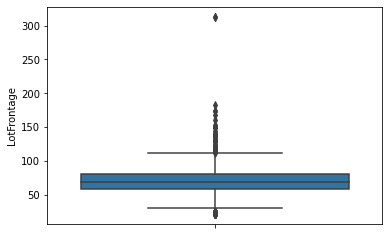

------------ GarageYrBlt ------------------


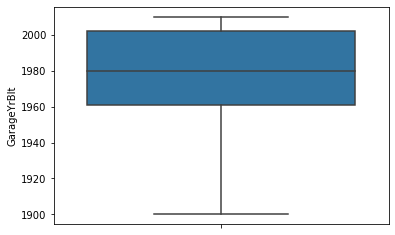

------------ MasVnrArea ------------------


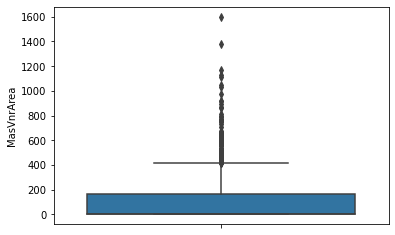

In [349]:
#let us check for Outliers using box plot ( cleaning data again) on continous variable / numberical_cols
#plot boxplot to check for outliers

for col in numberical_cols_missing:
    print("------------", col ,"------------------")
    sns.boxplot(y=sales_data[col])
    plt.show()

In [350]:
sales_data[numberical_cols].describe()

NameError: name 'numberical_cols' is not defined

**Observation**

- Based on above, we observe outliers for LotFrontage and MasVnrArea.
- GarageYrBlt does not have outlier

Two options we have:

1. Remove the outlier records OR
2. Imput the missing values
    
Missing % for each feaure, outlier and imputation method applied are

- Column       |   Missing (%)| Outlier |  Imputation

- LotFrontage  |   17.739726  | Yes     |  Median

- GarageYrBlt  |   5.547945   | No      |  Mean

- MasVnrArea   |   0.547945   | Yes     |  Median


So we cannot delete record for missing LotFrontage as we will lose 17% of records, so we will imput missing value by taking mean/median based on outlier 
however we can delete GarageYrBlt & MasVnrArea as percentage of record missing is less. Or we can take mean/median based on outlier

I am going ahead with option 2 retaining the data for all three columns by imputting missing values



#### Imput the missing values

In [351]:
sales_data['LotFrontage']= sales_data['LotFrontage'].fillna(sales_data['LotFrontage'].median())
sales_data['GarageYrBlt']= sales_data['GarageYrBlt'].fillna(sales_data['GarageYrBlt'].mean())
sales_data['MasVnrArea']= sales_data['MasVnrArea'].fillna(sales_data['MasVnrArea'].median())

In [352]:
#check again missing values in percentage, after removing columns just to be sure
missing_sales_data_perc = (sales_data.isnull().sum() / sales_data.isnull().count()*100).sort_values(ascending = False)
missing_sales_data_perc = missing_sales_data_perc[missing_sales_data_perc>0] # checking where missing % is greater than zero
missing_sales_data_perc

GarageType      5.547945
GarageCond      5.547945
GarageFinish    5.547945
GarageQual      5.547945
BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtCond        2.534247
BsmtQual        2.534247
MasVnrType      0.547945
Electrical      0.068493
dtype: float64

In [353]:
#copied from above for refernce - categorical and numberical cols list, columns having missing values
#categorical_cols_missing = ['GarageType','GarageCond','GarageFinish','GarageQual','BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType','Electrical']
#numberical_cols_missing = ['LotFrontage','GarageYrBlt','MasVnrArea']

### Now we are left with missing value for categorical variables/columns
#### Note: please refer dictionary to replace value for nan based on its meaning
#### Handling categorical missing value column - GarageType

In [354]:
sales_data['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [355]:
sales_data['GarageType'] = sales_data['GarageType'].replace(np.nan, 'NoGarage')

#### Handling categorical missing value column - GarageCond

In [356]:
sales_data['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [357]:
sales_data['GarageCond'] = sales_data['GarageCond'].replace(np.nan, 'NoGarage')

#### Handling categorical missing value column - GarageFinish

In [358]:
sales_data['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [359]:
sales_data['GarageFinish'] = sales_data['GarageFinish'].replace(np.nan, 'NoGarage')

#### Handling categorical missing value column - GarageQual

In [360]:
sales_data['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [361]:
sales_data['GarageQual'] = sales_data['GarageQual'].replace(np.nan, 'NoGarage')

#### Handling categorical missing value column - BsmtFinType2

In [362]:
sales_data['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [363]:
sales_data['BsmtFinType2'] = sales_data['BsmtFinType2'].replace(np.nan, 'NoBasement')

#### Handling categorical missing value column - BsmtExposure

In [364]:
sales_data['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [365]:
sales_data['BsmtExposure'] = sales_data['BsmtExposure'].replace(np.nan, 'NoBasement')

#### Handling categorical missing value column - BsmtFinType1

In [366]:
sales_data['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [367]:
sales_data['BsmtFinType1'] = sales_data['BsmtFinType1'].replace(np.nan, 'NoBasement')

#### Handling categorical missing value column - BsmtCond

In [368]:
sales_data['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [369]:
sales_data['BsmtCond'] = sales_data['BsmtCond'].replace(np.nan, 'NoBasement')

#### Handling categorical missing value column - BsmtQual

In [370]:
sales_data['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [371]:
sales_data['BsmtQual'] = sales_data['BsmtQual'].replace(np.nan, 'NoBasement')

#### Handling categorical missing value column - MasVnrType

In [372]:
sales_data['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [373]:
#there is no details for nan in data description file
#for categorical variable, we calculate the mode of it
#And replace all the missing values with it.
MasVnrType_mode = sales_data['MasVnrType'].mode()
MasVnrType_mode[0]

'None'

In [374]:
sales_data['MasVnrType'].fillna(sales_data['MasVnrType'].mode()[0],inplace=True)

#### Handling categorical missing value column - Electrical

In [375]:
sales_data['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [376]:
#No details present in data description text, so applying mode
sales_data['Electrical'].fillna(sales_data['Electrical'].mode()[0],inplace=True)

#### check again missing values in percentage, after removing columns just to be sure

In [377]:
#check again missing values in percentage, after removing columns just to be sure
missing_sales_data_perc = (sales_data.isnull().sum() / sales_data.isnull().count()*100).sort_values(ascending = False)
#missing_sales_data_perc = missing_sales_data_perc[missing_sales_data_perc>0] # checking where missing % is greater than zero
missing_sales_data_perc.head(5)

MSSubClass      0.0
GarageYrBlt     0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
dtype: float64

### We can see now that there is no missing values in the data

#### Creating categorical and continous column list which will be handy for analysis

In [378]:
categorical_cols = sales_data.select_dtypes(include=['object'])
categorical_cols.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [379]:
continuous_cols = sales_data.select_dtypes(include=['int64','float64'])
continuous_cols.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### let us check for Outliers using box plot ( cleaning data again) on continous variable

#### plot boxplot to check for outliers

------------ MSSubClass ------------------


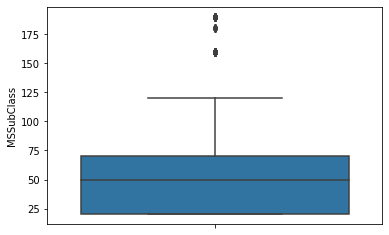

------------ LotFrontage ------------------


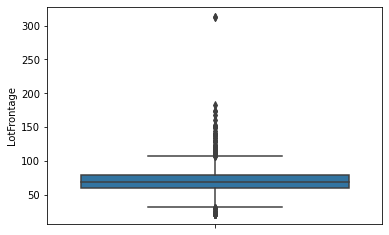

------------ LotArea ------------------


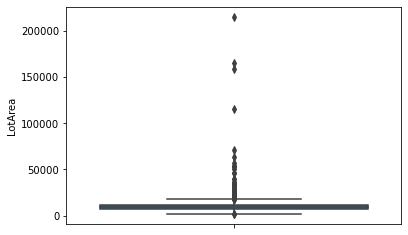

------------ OverallQual ------------------


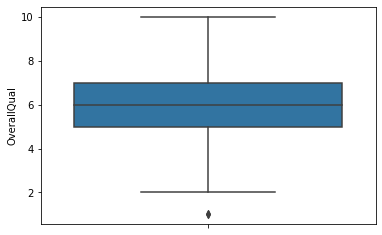

------------ OverallCond ------------------


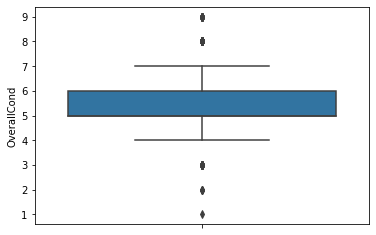

------------ YearBuilt ------------------


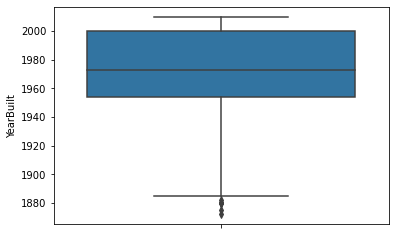

------------ YearRemodAdd ------------------


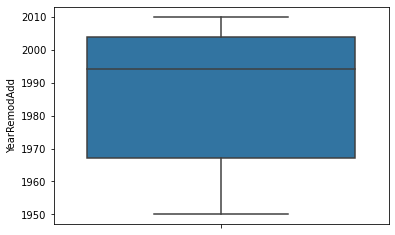

------------ MasVnrArea ------------------


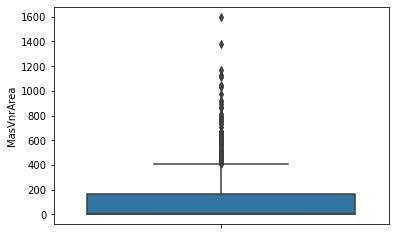

------------ BsmtFinSF1 ------------------


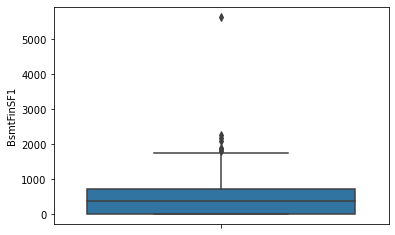

------------ BsmtFinSF2 ------------------


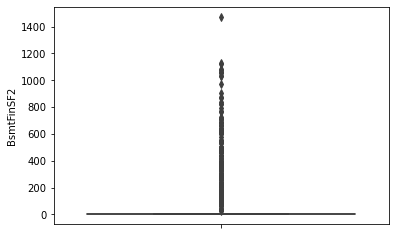

------------ BsmtUnfSF ------------------


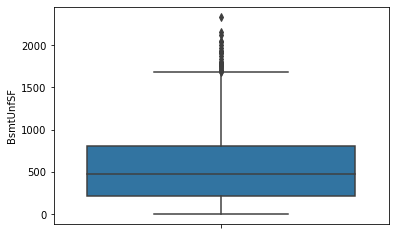

------------ TotalBsmtSF ------------------


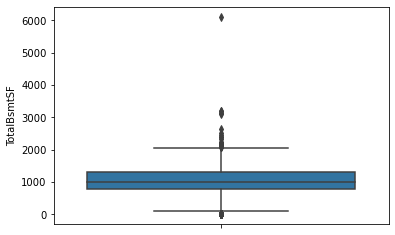

------------ 1stFlrSF ------------------


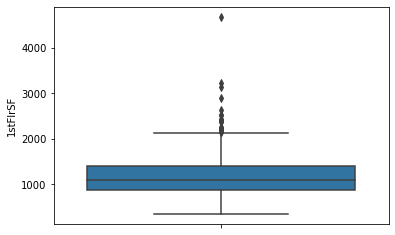

------------ 2ndFlrSF ------------------


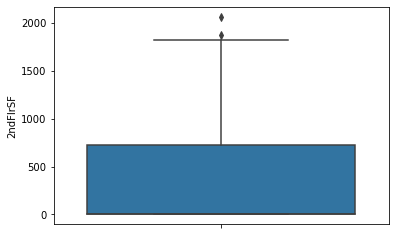

------------ LowQualFinSF ------------------


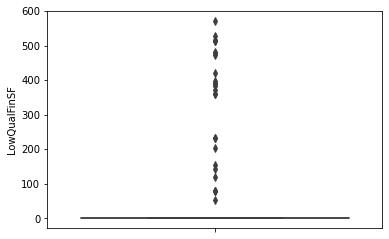

------------ GrLivArea ------------------


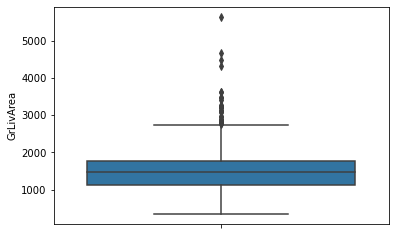

------------ BsmtFullBath ------------------


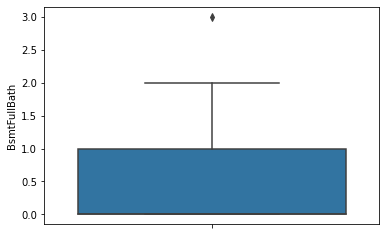

------------ BsmtHalfBath ------------------


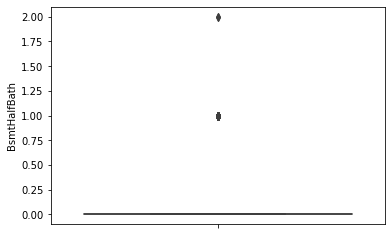

------------ FullBath ------------------


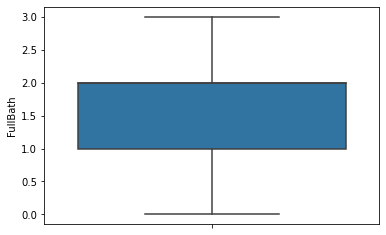

------------ HalfBath ------------------


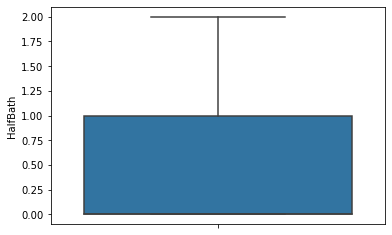

------------ BedroomAbvGr ------------------


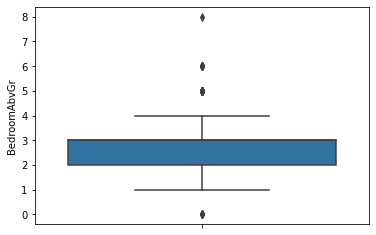

------------ KitchenAbvGr ------------------


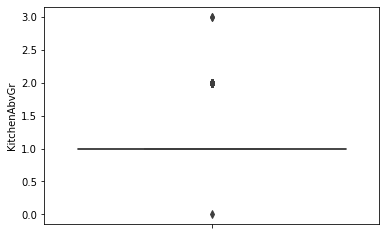

------------ TotRmsAbvGrd ------------------


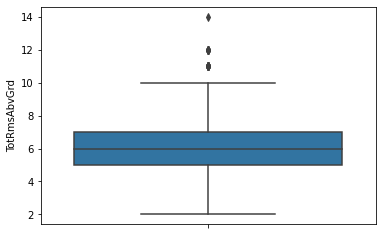

------------ Fireplaces ------------------


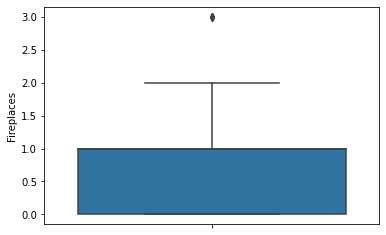

------------ GarageYrBlt ------------------


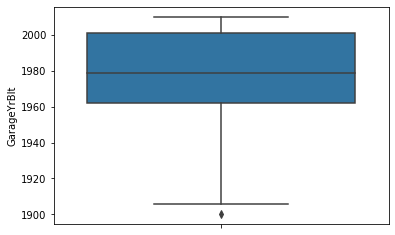

------------ GarageCars ------------------


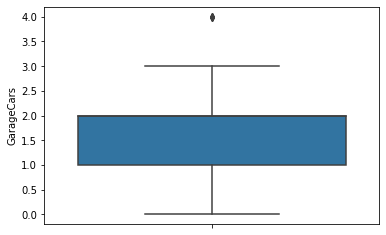

------------ GarageArea ------------------


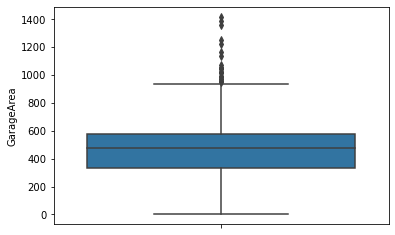

------------ WoodDeckSF ------------------


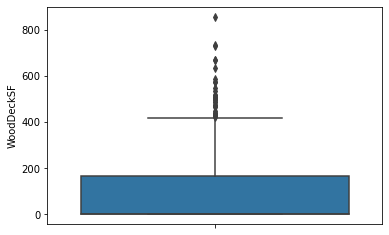

------------ OpenPorchSF ------------------


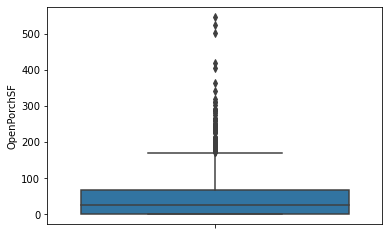

------------ EnclosedPorch ------------------


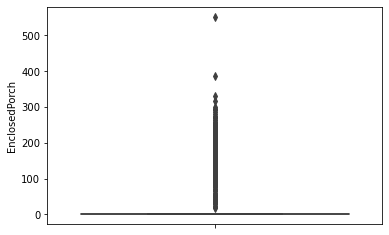

------------ 3SsnPorch ------------------


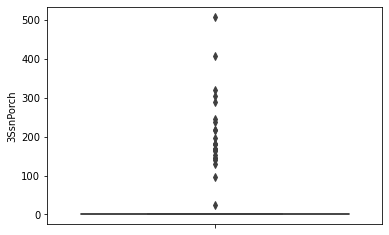

------------ ScreenPorch ------------------


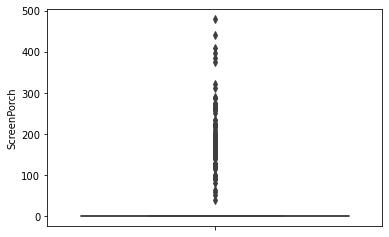

------------ PoolArea ------------------


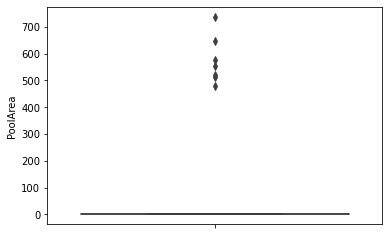

------------ MiscVal ------------------


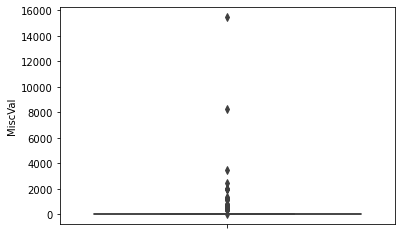

------------ MoSold ------------------


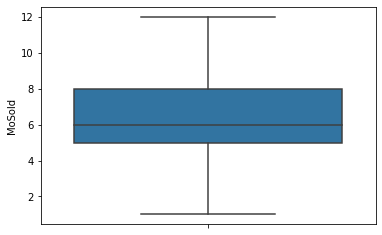

------------ YrSold ------------------


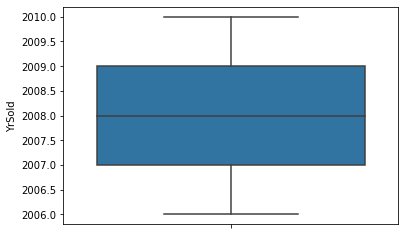

------------ SalePrice ------------------


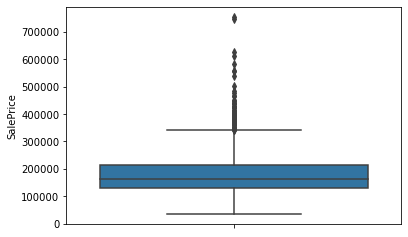

In [380]:
for col in continuous_cols:
    print("------------", col ,"------------------")
    sns.boxplot(y=sales_data[col])
    plt.show()

#### outliers are for below continuous variables
- LotFrontage 
- LotArea 
- MasVnrArea 
- BsmtFinSF2 
- BsmtUnfSF 
- 1stFlrSF 
- LowQualFinSF 
- GrLivArea 
- BsmtHalfBath 
- KitchenAbvGr  - seems very less data?
- GarageArea 
- WoodDeckSF 
- OpenPorchSF 
- EnclosedPorch 
- 3SsnPorch 
- ScreenPorch 
- PoolArea  - seems very less data?
- MiscVal - seems very less data?

<AxesSubplot:xlabel='MiscVal', ylabel='Density'>

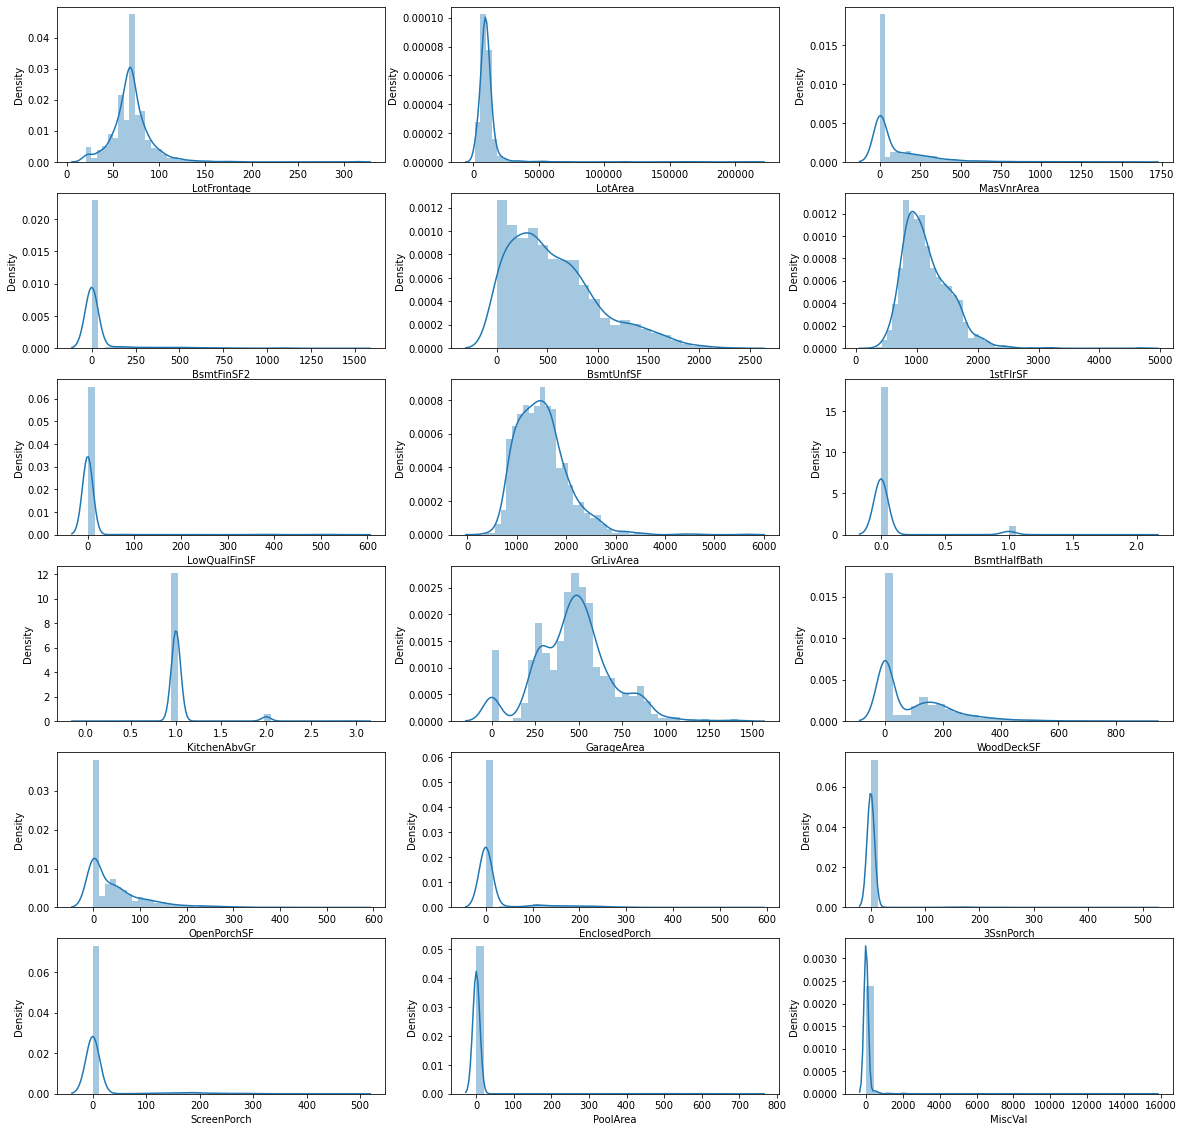

In [381]:
plt.figure(figsize=(20, 20))
plt.subplot(6,3,1)
sns.distplot(sales_data['LotFrontage'])
plt.subplot(6,3,2)
sns.distplot(sales_data['LotArea'])
plt.subplot(6,3,3)
sns.distplot(sales_data['MasVnrArea'])
plt.subplot(6,3,4)
sns.distplot(sales_data['BsmtFinSF2'])
plt.subplot(6,3,5)
sns.distplot(sales_data['BsmtUnfSF'])
plt.subplot(6,3,6)
sns.distplot(sales_data['1stFlrSF'])

plt.subplot(6,3,7)
sns.distplot(sales_data['LowQualFinSF'])
plt.subplot(6,3,8)
sns.distplot(sales_data['GrLivArea'])
plt.subplot(6,3,9)
sns.distplot(sales_data['BsmtHalfBath'])
plt.subplot(6,3,10)
sns.distplot(sales_data['KitchenAbvGr'])
plt.subplot(6,3,11)
sns.distplot(sales_data['GarageArea'])
plt.subplot(6,3,12)
sns.distplot(sales_data['WoodDeckSF'])

plt.subplot(6,3,13)
sns.distplot(sales_data['OpenPorchSF'])
plt.subplot(6,3,14)
sns.distplot(sales_data['EnclosedPorch'])
plt.subplot(6,3,15)
sns.distplot(sales_data['3SsnPorch'])
plt.subplot(6,3,16)
sns.distplot(sales_data['ScreenPorch'])
plt.subplot(6,3,17)
sns.distplot(sales_data['PoolArea'])
plt.subplot(6,3,18)
sns.distplot(sales_data['MiscVal'])

### Handling categorical columns which are treated as numeric

There are three such columns as we can see in data description file
- MSSubClass
- OverallQual
- OverallCond


#### Changing MSSubClass column to categorical

In [382]:
#changing MSSubClass column to categorical
#As per data description -> MSSubClass: Identifies the type of dwelling involved in the sale.
    
sales_data['MSSubClass']=sales_data['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',
                                                           30:'1-STORY 1945 & OLDER',
                                                           40:'1-STORY W/FINISHED ATTIC ALL AGES',
                                                           45:'1-1/2 STORY - UNFINISHED ALL AGES',
                                                           50:'1-1/2 STORY FINISHED ALL AGES',
                                                           60:'2-STORY 1946 & NEWER',
                                                           70:'2-STORY 1945 & OLDER',
                                                           75:'2-1/2 STORY ALL AGES',
                                                           80:'SPLIT OR MULTI-LEVEL',
                                                           85:'SPLIT FOYER',
                                                           90:'DUPLEX - ALL STYLES AND AGES',
                                                           120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                                                           150:'1-1/2 STORY PUD - ALL AGES',
                                                           160:'2-STORY PUD - 1946 & NEWER',
                                                           180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                                                           190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

In [383]:
sales_data['MSSubClass']

0                  2-STORY 1946 & NEWER
1       1-STORY 1946 & NEWER ALL STYLES
2                  2-STORY 1946 & NEWER
3                  2-STORY 1945 & OLDER
4                  2-STORY 1946 & NEWER
                     ...               
1455               2-STORY 1946 & NEWER
1456    1-STORY 1946 & NEWER ALL STYLES
1457               2-STORY 1945 & OLDER
1458    1-STORY 1946 & NEWER ALL STYLES
1459    1-STORY 1946 & NEWER ALL STYLES
Name: MSSubClass, Length: 1460, dtype: object

#### Changing OverallQual column to categorical

In [384]:
#changing OverallQual column to categorical
# OverallQual: Rates the overall material and finish of the house
sales_data['OverallQual']=sales_data['OverallQual'].replace({ 10:'Very Excellent',
                                                             9:'Excellent',
                                                             8:'Very Good',
                                                             7:'Good',
                                                             6:'Above Average',
                                                             5:'Average',
                                                             4:'Below Average',
                                                             3:'Fair',
                                                             2:'Poor',
                                                             1:'Very Poor'})

In [385]:
sales_data['OverallQual']

0                Good
1       Above Average
2                Good
3                Good
4           Very Good
            ...      
1455    Above Average
1456    Above Average
1457             Good
1458          Average
1459          Average
Name: OverallQual, Length: 1460, dtype: object

#### Changing OverallCond column to categorical

In [386]:
#changing OverallCond column to categorical
# OverallCond: Rates the overall condition of the house
sales_data['OverallCond']=sales_data['OverallCond'].replace({ 10:'Very Excellent',
                                                       9:'Excellent',
                                                       8:'Very Good',
                                                       7:'Good',
                                                       6:'Above Average',
                                                       5:'Average',
                                                       4:'Below Average',
                                                       3:'Fair',
                                                       2:'Poor',
                                                       1:'Very Poor'})

In [387]:
sales_data['OverallCond']

0             Average
1           Very Good
2             Average
3             Average
4             Average
            ...      
1455          Average
1456    Above Average
1457        Excellent
1458    Above Average
1459    Above Average
Name: OverallCond, Length: 1460, dtype: object

In [388]:
sales_data.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,Very Good,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500


In [389]:
#Again getting the updated list as data types are changed for three columns
continuous_cols = sales_data.select_dtypes(include=['int64','float64'])
categorical_cols = sales_data.select_dtypes(include=['object'])

### EDA

#### Analtsis of impact of categorical variable on sales price (SalePrice)

In [390]:
categorical_cols.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

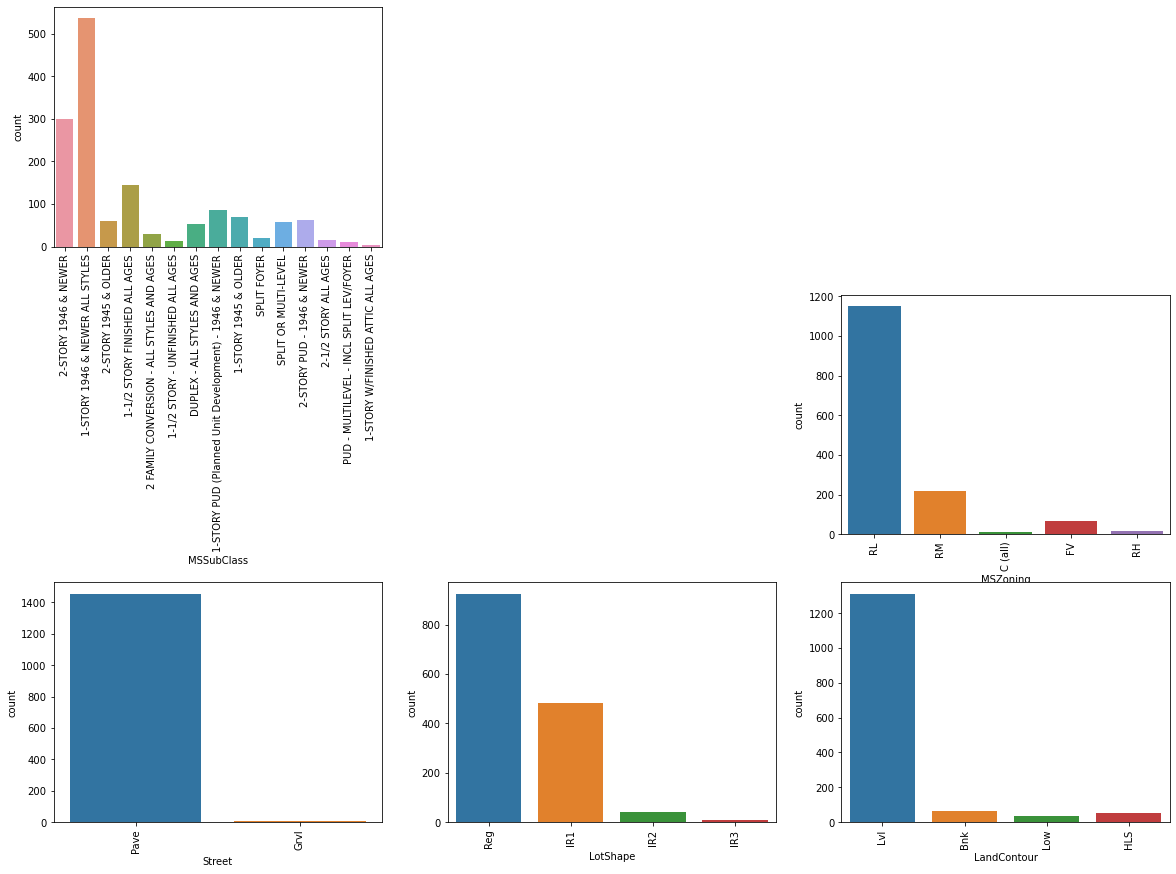

In [391]:
# 'MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour'

plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.countplot(x = 'MSSubClass',  data = sales_data)
plt.xticks(rotation=90)
plt.subplot(3,3,6)
sns.countplot(x = 'MSZoning', data = sales_data)
plt.xticks(rotation=90)
plt.subplot(3,3,7)
sns.countplot(x = 'Street', data = sales_data)
plt.xticks(rotation=90)
plt.subplot(3,3,8)
sns.countplot(x = 'LotShape', data = sales_data)
plt.xticks(rotation=90)

plt.subplot(3,3,9)
sns.countplot(x = 'LandContour',  data = sales_data)
plt.xticks(rotation=90)


plt.show()

#### Above we can see below predictors are highly skewed
- Street
- LandContour

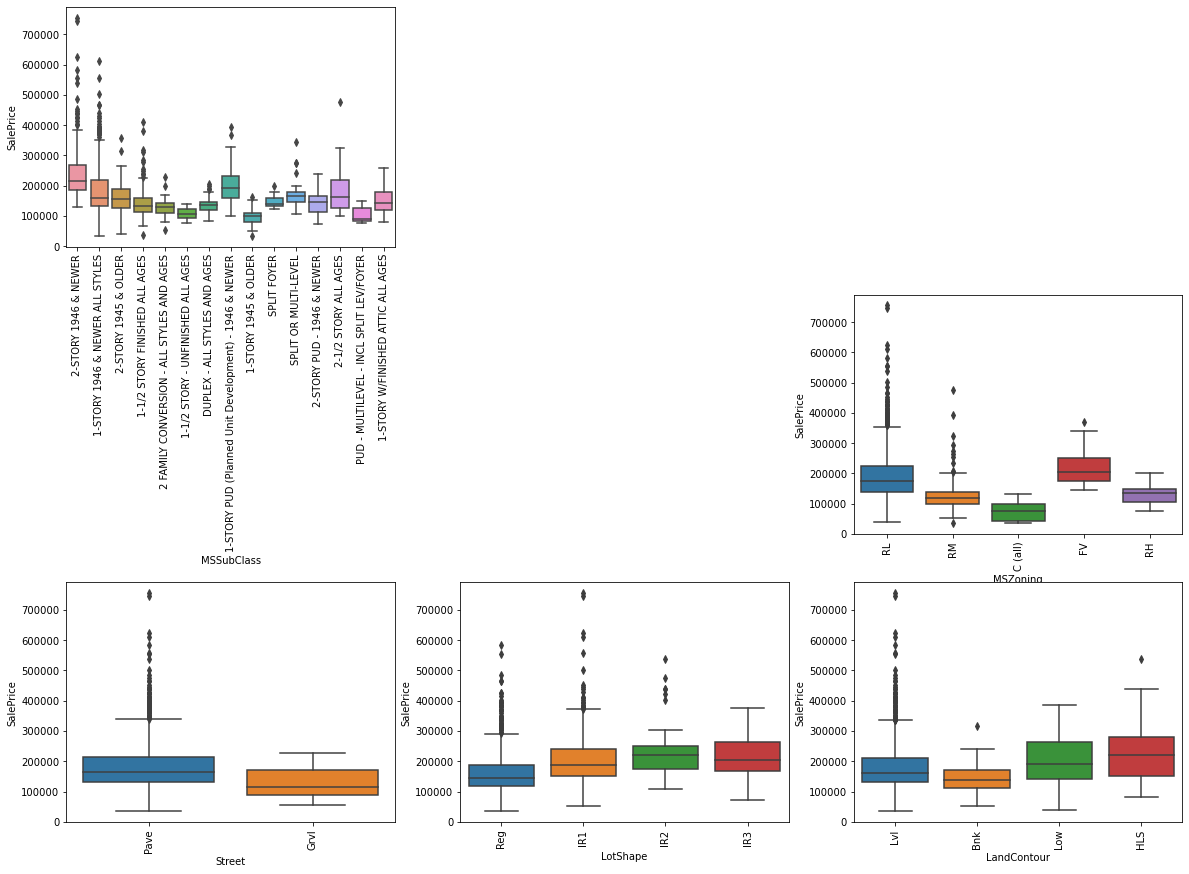

In [392]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'MSSubClass',  data = sales_data, y = 'SalePrice')

plt.xticks(rotation=90)
plt.subplot(3,3,6)
sns.boxplot(x = 'MSZoning', data = sales_data, y = 'SalePrice')
plt.xticks(rotation=90)
plt.subplot(3,3,7)
sns.boxplot(x = 'Street', data = sales_data, y = 'SalePrice')
plt.xticks(rotation=90)
plt.subplot(3,3,8)
sns.boxplot(x = 'LotShape', data = sales_data, y = 'SalePrice')
plt.xticks(rotation=90)

plt.subplot(3,3,9)
sns.boxplot(x = 'LandContour',  data = sales_data, y = 'SalePrice')
plt.xticks(rotation=90)


plt.show()

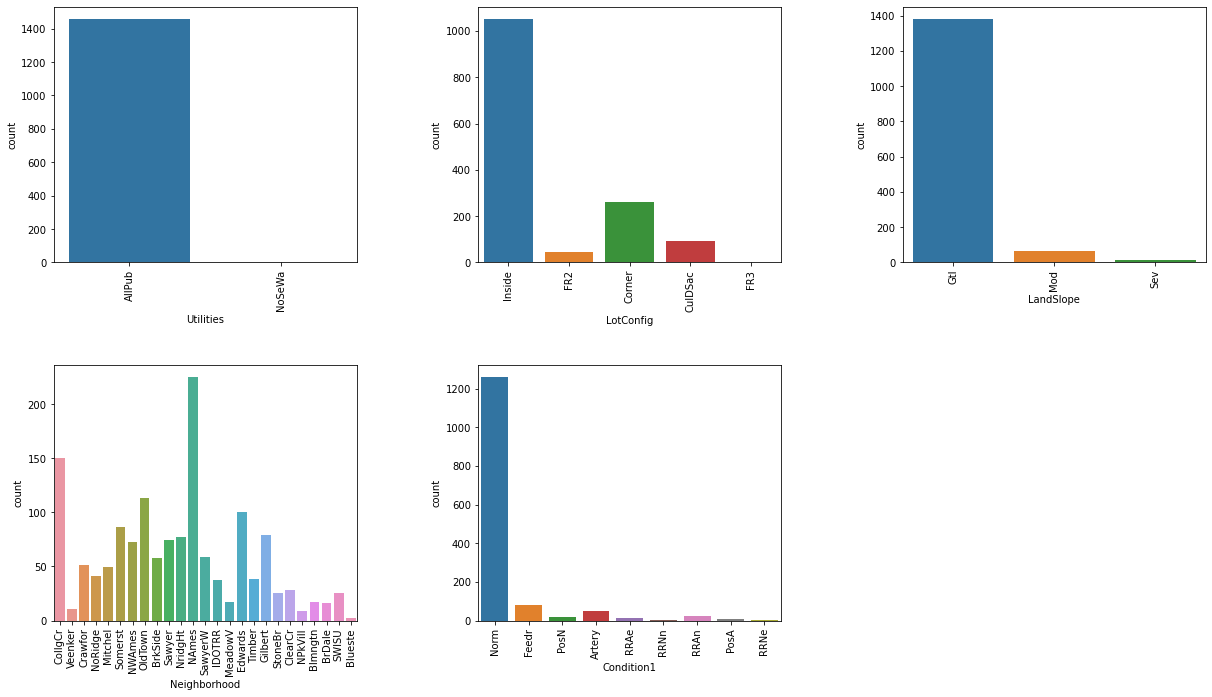

In [393]:
#'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1'

plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.countplot(x = 'Utilities',  data = sales_data)
plt.xticks(rotation=90)
plt.subplot(3,3,2)
sns.countplot(x = 'LotConfig', data = sales_data)
plt.xticks(rotation=90)
plt.subplot(3,3,3)
sns.countplot(x = 'LandSlope', data = sales_data)
plt.xticks(rotation=90)
plt.subplot(3,3,4)
sns.countplot(x = 'Neighborhood', data = sales_data)
plt.xticks(rotation=90)

plt.subplot(3,3,5)
sns.countplot(x = 'Condition1',  data = sales_data)
plt.xticks(rotation=90)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.4, hspace=0.4)
plt.show()

#### Above we can see below predictors are highly skewed
- Utilities
- LandSlope
- Condition1


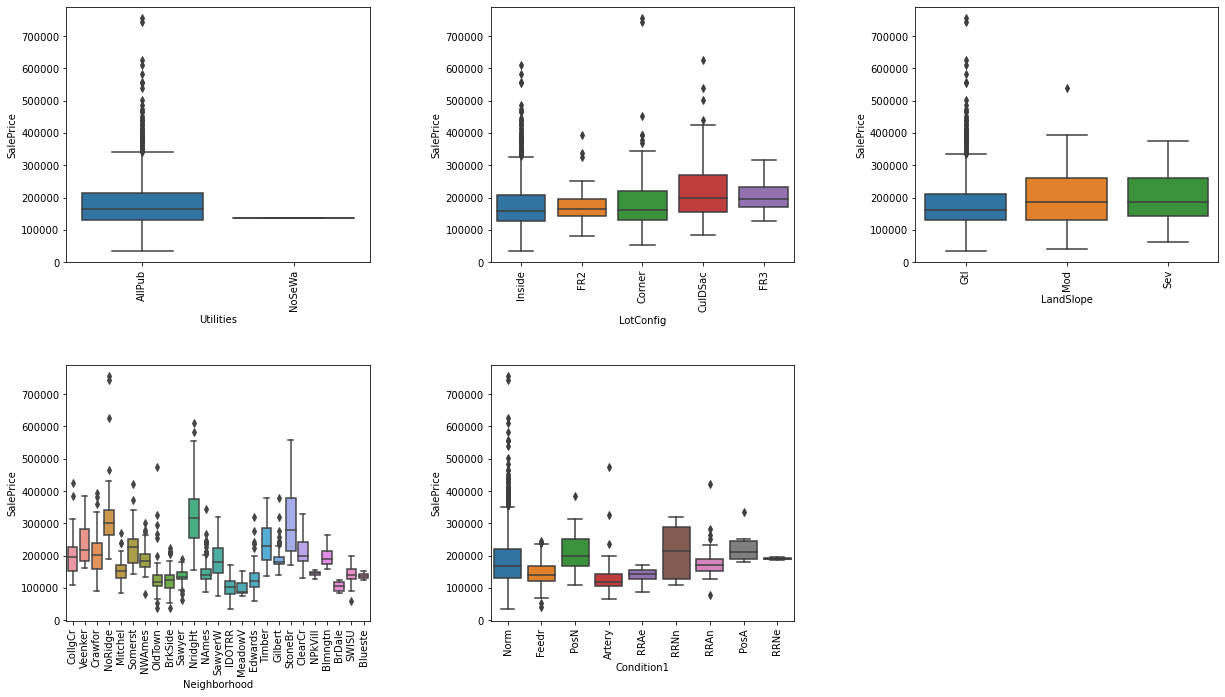

In [394]:

plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'Utilities',  data = sales_data, y = 'SalePrice')
plt.xticks(rotation=90)
plt.subplot(3,3,2)
sns.boxplot(x = 'LotConfig', data = sales_data, y = 'SalePrice')
plt.xticks(rotation=90)
plt.subplot(3,3,3)
sns.boxplot(x = 'LandSlope', data = sales_data, y = 'SalePrice')
plt.xticks(rotation=90)
plt.subplot(3,3,4)
sns.boxplot(x = 'Neighborhood', data = sales_data, y = 'SalePrice')
plt.xticks(rotation=90)

plt.subplot(3,3,5)
sns.boxplot(x = 'Condition1',  data = sales_data, y = 'SalePrice')
plt.xticks(rotation=90)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.4, hspace=0.4)
plt.show()

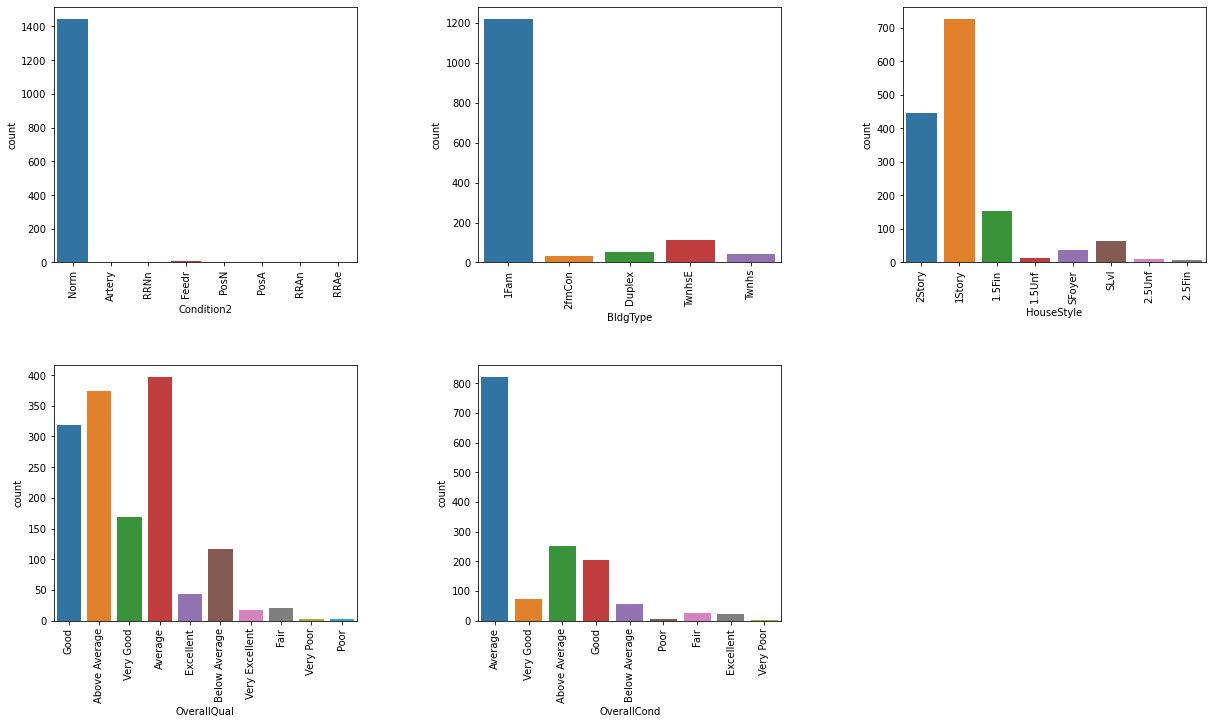

In [395]:
#'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond'
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.countplot(x = 'Condition2',  data = sales_data)
plt.xticks(rotation=90)
plt.subplot(3,3,2)
sns.countplot(x = 'BldgType', data = sales_data)
plt.xticks(rotation=90)
plt.subplot(3,3,3)
sns.countplot(x = 'HouseStyle', data = sales_data)
plt.xticks(rotation=90)
plt.subplot(3,3,4)
sns.countplot(x = 'OverallQual', data = sales_data)
plt.xticks(rotation=90)

plt.subplot(3,3,5)
sns.countplot(x = 'OverallCond',  data = sales_data)
plt.xticks(rotation=90)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.4, hspace=0.4)
plt.show()

#### Above we can see below predictors are highly skewed
- Condition2

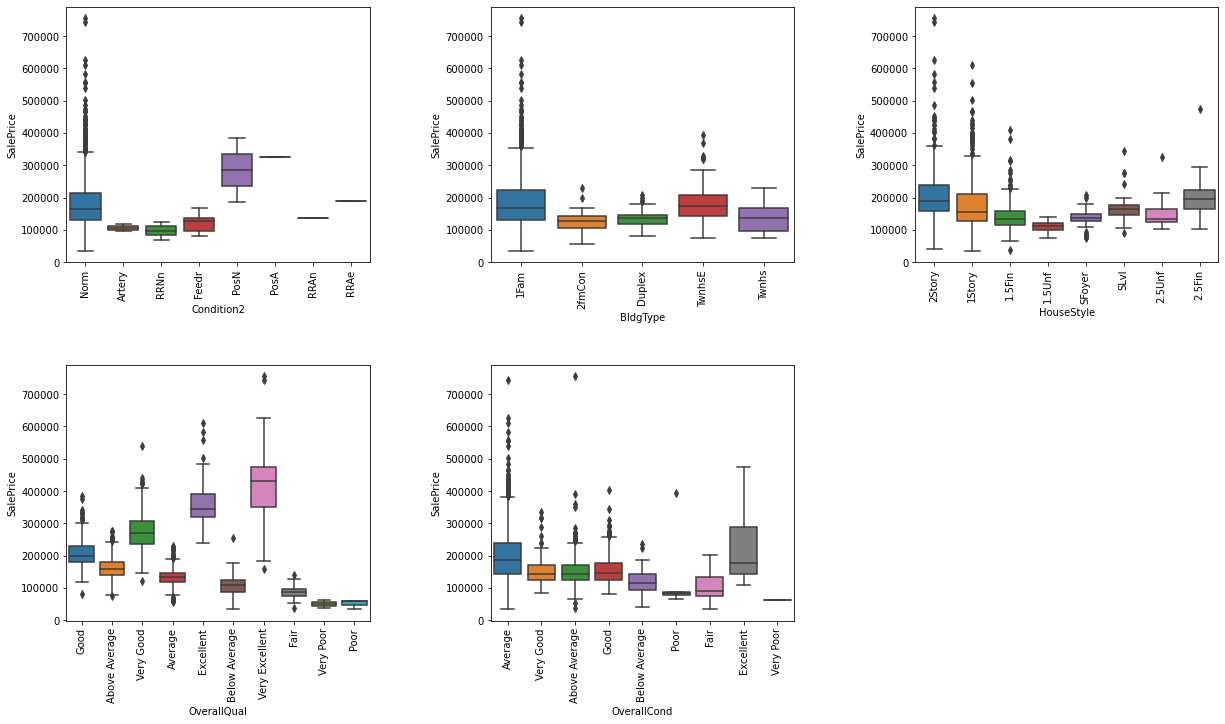

In [396]:
#'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond'
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'Condition2',  data = sales_data, y='SalePrice')
plt.xticks(rotation=90)
plt.subplot(3,3,2)
sns.boxplot(x = 'BldgType', data = sales_data, y='SalePrice')
plt.xticks(rotation=90)
plt.subplot(3,3,3)
sns.boxplot(x = 'HouseStyle', data = sales_data, y='SalePrice')
plt.xticks(rotation=90)
plt.subplot(3,3,4)
sns.boxplot(x = 'OverallQual', data = sales_data, y='SalePrice')
plt.xticks(rotation=90)

plt.subplot(3,3,5)
sns.boxplot(x = 'OverallCond',  data = sales_data, y='SalePrice')
plt.xticks(rotation=90)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.4, hspace=0.4)
plt.show()

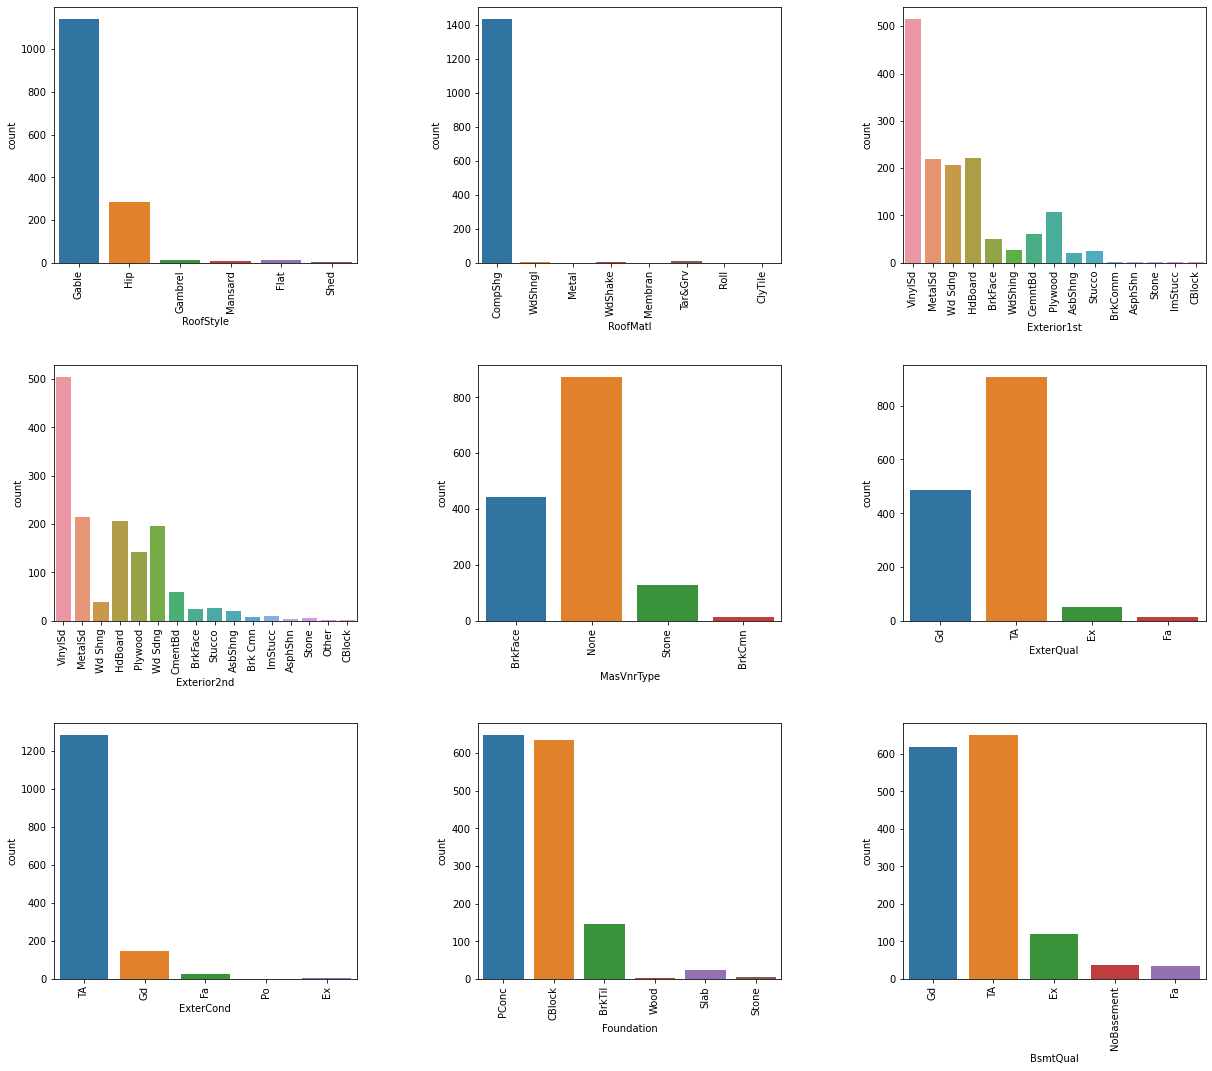

In [397]:
#'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual'
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.countplot(x = 'RoofStyle',  data = sales_data)
plt.xticks(rotation=90)
plt.subplot(3,3,2)
sns.countplot(x = 'RoofMatl', data = sales_data)
plt.xticks(rotation=90)
plt.subplot(3,3,3)
sns.countplot(x = 'Exterior1st', data = sales_data)
plt.xticks(rotation=90)
plt.subplot(3,3,4)
sns.countplot(x = 'Exterior2nd', data = sales_data)
plt.xticks(rotation=90)

plt.subplot(3,3,5)
sns.countplot(x = 'MasVnrType',  data = sales_data)
plt.xticks(rotation=90)

plt.subplot(3,3,6)
sns.countplot(x = 'ExterQual',  data = sales_data)
plt.xticks(rotation=90)

plt.subplot(3,3,7)
sns.countplot(x = 'ExterCond',  data = sales_data)
plt.xticks(rotation=90)

plt.subplot(3,3,8)
sns.countplot(x = 'Foundation',  data = sales_data)
plt.xticks(rotation=90)

plt.subplot(3,3,9)
sns.countplot(x = 'BsmtQual',  data = sales_data)
plt.xticks(rotation=90)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.4, hspace=0.4)
plt.show()

#### Above we can see below predictors are highly skewed
- RoofMatl
- ExterCond


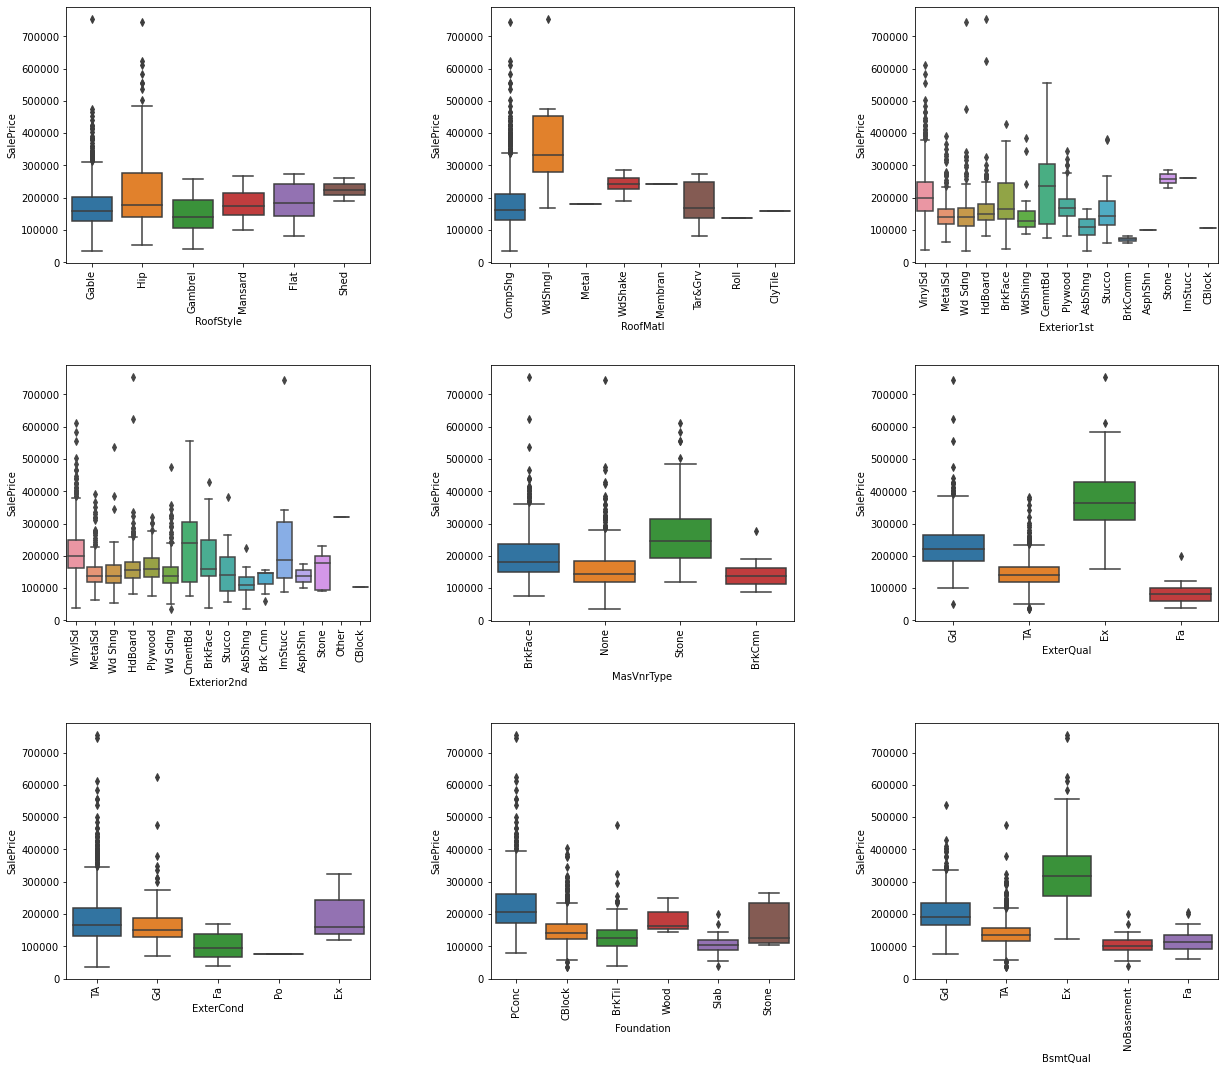

In [398]:
#'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual'
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'RoofStyle',  data = sales_data, y= 'SalePrice')
plt.xticks(rotation=90)
plt.subplot(3,3,2)
sns.boxplot(x = 'RoofMatl', data = sales_data, y= 'SalePrice')
plt.xticks(rotation=90)
plt.subplot(3,3,3)
sns.boxplot(x = 'Exterior1st', data = sales_data, y= 'SalePrice')
plt.xticks(rotation=90)
plt.subplot(3,3,4)
sns.boxplot(x = 'Exterior2nd', data = sales_data, y= 'SalePrice')
plt.xticks(rotation=90)

plt.subplot(3,3,5)
sns.boxplot(x = 'MasVnrType',  data = sales_data, y= 'SalePrice')
plt.xticks(rotation=90)

plt.subplot(3,3,6)
sns.boxplot(x = 'ExterQual',  data = sales_data, y= 'SalePrice')
plt.xticks(rotation=90)

plt.subplot(3,3,7)
sns.boxplot(x = 'ExterCond',  data = sales_data, y= 'SalePrice')
plt.xticks(rotation=90)

plt.subplot(3,3,8)
sns.boxplot(x = 'Foundation',  data = sales_data, y= 'SalePrice')
plt.xticks(rotation=90)

plt.subplot(3,3,9)
sns.boxplot(x = 'BsmtQual',  data = sales_data, y= 'SalePrice')
plt.xticks(rotation=90)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.4, hspace=0.4)
plt.show()

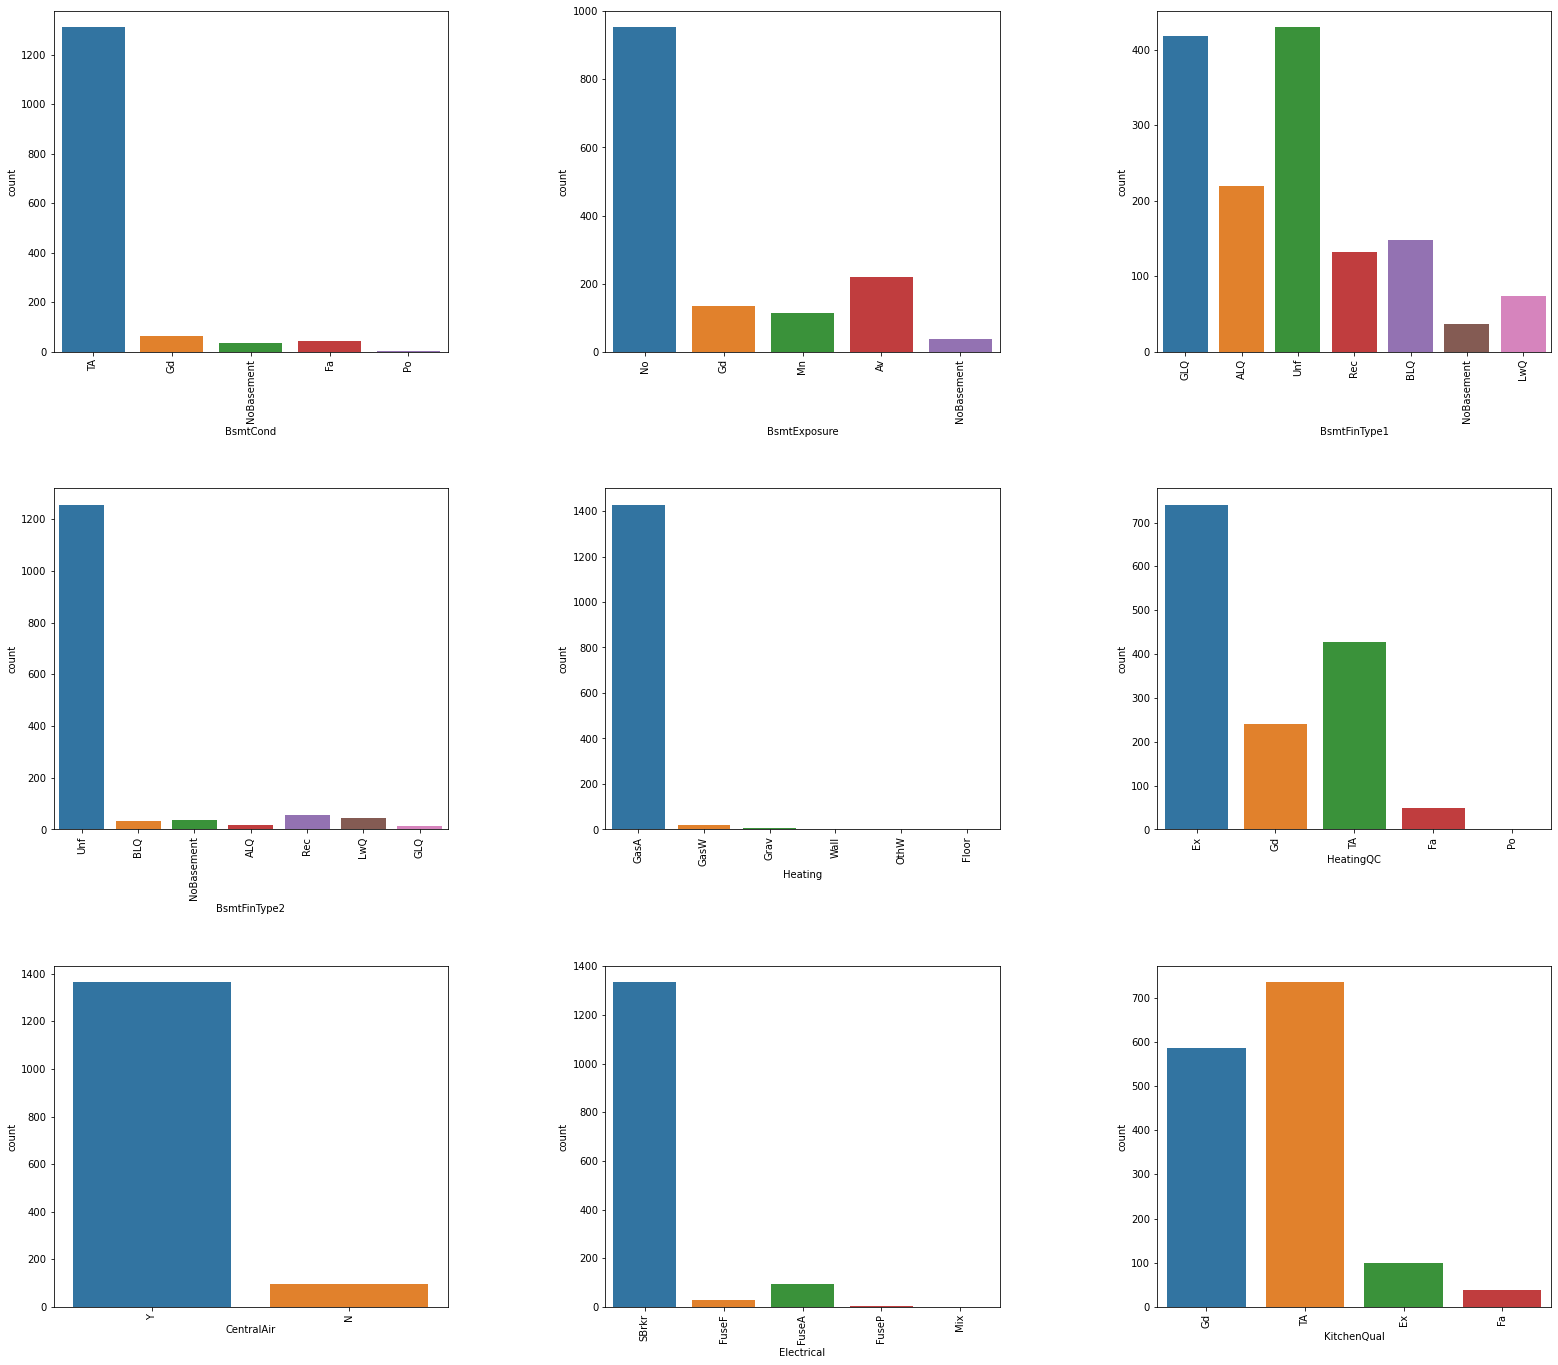

In [399]:
# 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual'
plt.figure(figsize=(26, 20))
plt.subplot(3,3,1)
sns.countplot(x = 'BsmtCond',  data = sales_data)
plt.xticks(rotation=90)
plt.subplot(3,3,2)
sns.countplot(x = 'BsmtExposure', data = sales_data)
plt.xticks(rotation=90)
plt.subplot(3,3,3)
sns.countplot(x = 'BsmtFinType1', data = sales_data)
plt.xticks(rotation=90)
plt.subplot(3,3,4)
sns.countplot(x = 'BsmtFinType2', data = sales_data)
plt.xticks(rotation=90)

plt.subplot(3,3,5)
sns.countplot(x = 'Heating',  data = sales_data)
plt.xticks(rotation=90)

plt.subplot(3,3,6)
sns.countplot(x = 'HeatingQC',  data = sales_data)
plt.xticks(rotation=90)

plt.subplot(3,3,7)
sns.countplot(x = 'CentralAir',  data = sales_data)
plt.xticks(rotation=90)

plt.subplot(3,3,8)
sns.countplot(x = 'Electrical',  data = sales_data)
plt.xticks(rotation=90)

plt.subplot(3,3,9)
sns.countplot(x = 'KitchenQual',  data = sales_data)
plt.xticks(rotation=90)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.4, hspace=0.4)
plt.show()

#### Above we can see below predictors are highly skewed
- BsmtCond
- BsmtFinType2
- Heating
- CentralAir
- Electrical


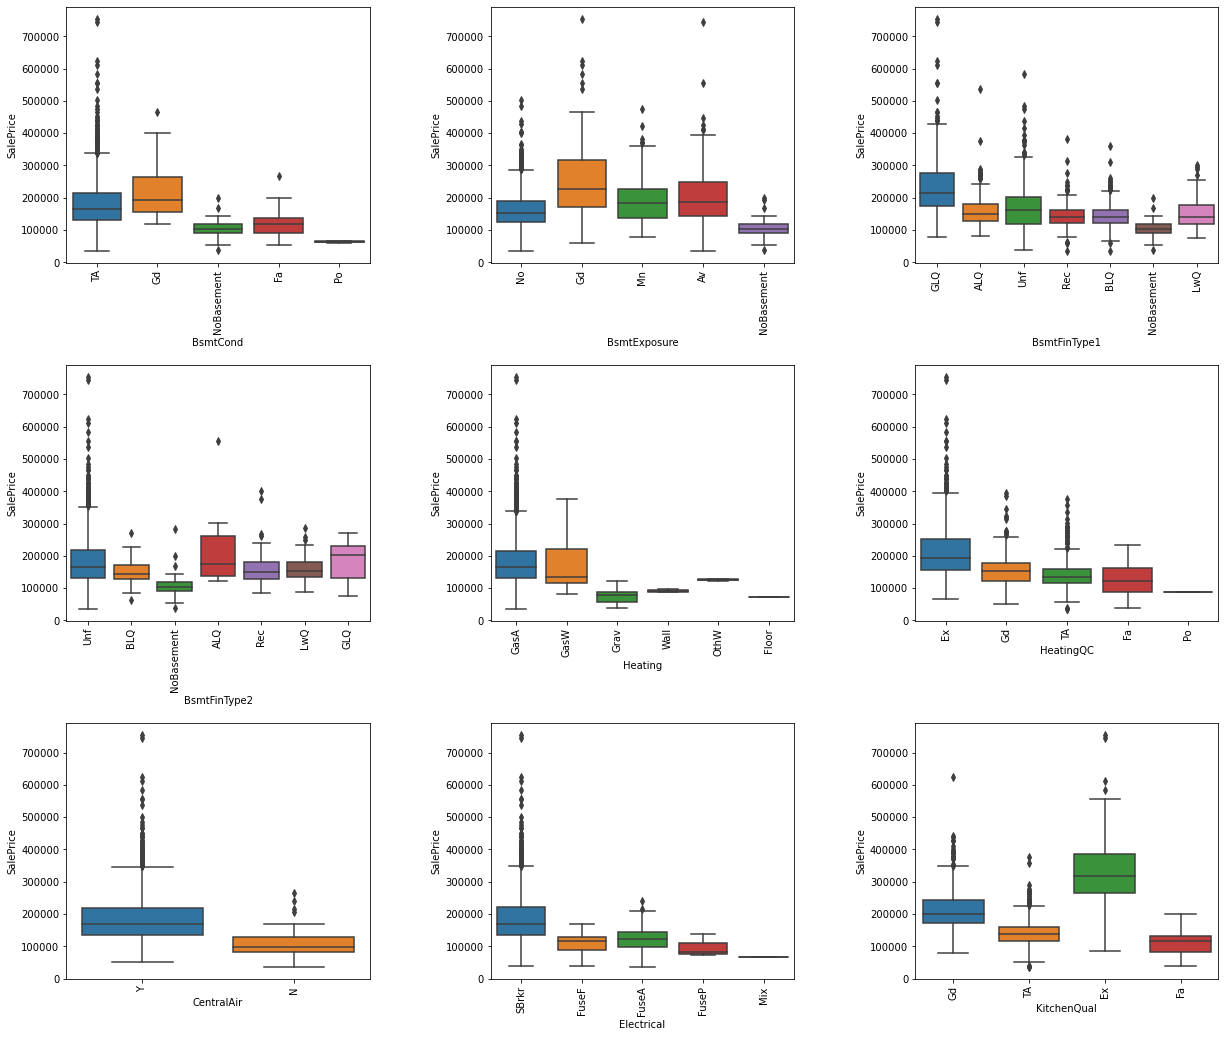

In [400]:
# 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual'
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'BsmtCond',  data = sales_data, y = 'SalePrice')
plt.xticks(rotation=90)
plt.subplot(3,3,2)
sns.boxplot(x = 'BsmtExposure', data = sales_data, y = 'SalePrice')
plt.xticks(rotation=90)
plt.subplot(3,3,3)
sns.boxplot(x = 'BsmtFinType1', data = sales_data, y = 'SalePrice')
plt.xticks(rotation=90)
plt.subplot(3,3,4)
sns.boxplot(x = 'BsmtFinType2', data = sales_data, y = 'SalePrice')
plt.xticks(rotation=90)

plt.subplot(3,3,5)
sns.boxplot(x = 'Heating',  data = sales_data, y = 'SalePrice')
plt.xticks(rotation=90)

plt.subplot(3,3,6)
sns.boxplot(x = 'HeatingQC',  data = sales_data, y = 'SalePrice')
plt.xticks(rotation=90)

plt.subplot(3,3,7)
sns.boxplot(x = 'CentralAir',  data = sales_data, y = 'SalePrice')
plt.xticks(rotation=90)

plt.subplot(3,3,8)
sns.boxplot(x = 'Electrical',  data = sales_data, y = 'SalePrice')
plt.xticks(rotation=90)

plt.subplot(3,3,9)
sns.boxplot(x = 'KitchenQual',  data = sales_data, y = 'SalePrice')
plt.xticks(rotation=90)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.4, hspace=0.4)
plt.show()

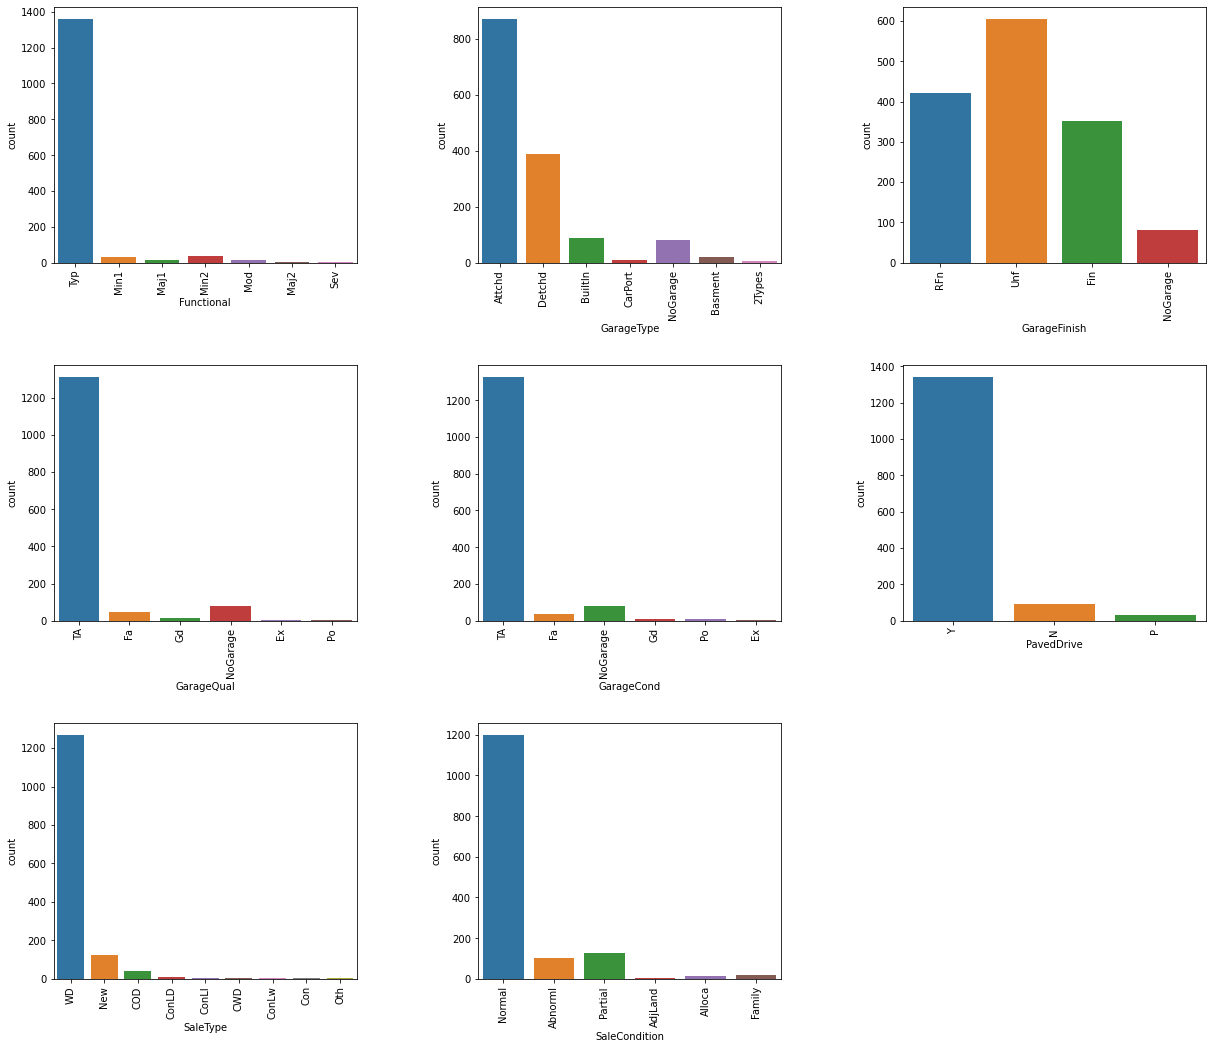

In [401]:
# 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',  'SaleCondition'
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.countplot(x = 'Functional',  data = sales_data)
plt.xticks(rotation=90)
plt.subplot(3,3,2)
sns.countplot(x = 'GarageType', data = sales_data)
plt.xticks(rotation=90)
plt.subplot(3,3,3)
sns.countplot(x = 'GarageFinish', data = sales_data)
plt.xticks(rotation=90)
plt.subplot(3,3,4)
sns.countplot(x = 'GarageQual', data = sales_data)
plt.xticks(rotation=90)

plt.subplot(3,3,5)
sns.countplot(x = 'GarageCond',  data = sales_data)
plt.xticks(rotation=90)

plt.subplot(3,3,6)
sns.countplot(x = 'PavedDrive',  data = sales_data)
plt.xticks(rotation=90)

plt.subplot(3,3,7)
sns.countplot(x = 'SaleType',  data = sales_data)
plt.xticks(rotation=90)

plt.subplot(3,3,8)
sns.countplot(x = 'SaleCondition',  data = sales_data)
plt.xticks(rotation=90)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.4, hspace=0.4)
plt.show()

#### Above we can see below predictors are highly skewed
- Functional
- GarageQual
- GarageCond
- PavedDrive
- SaleType


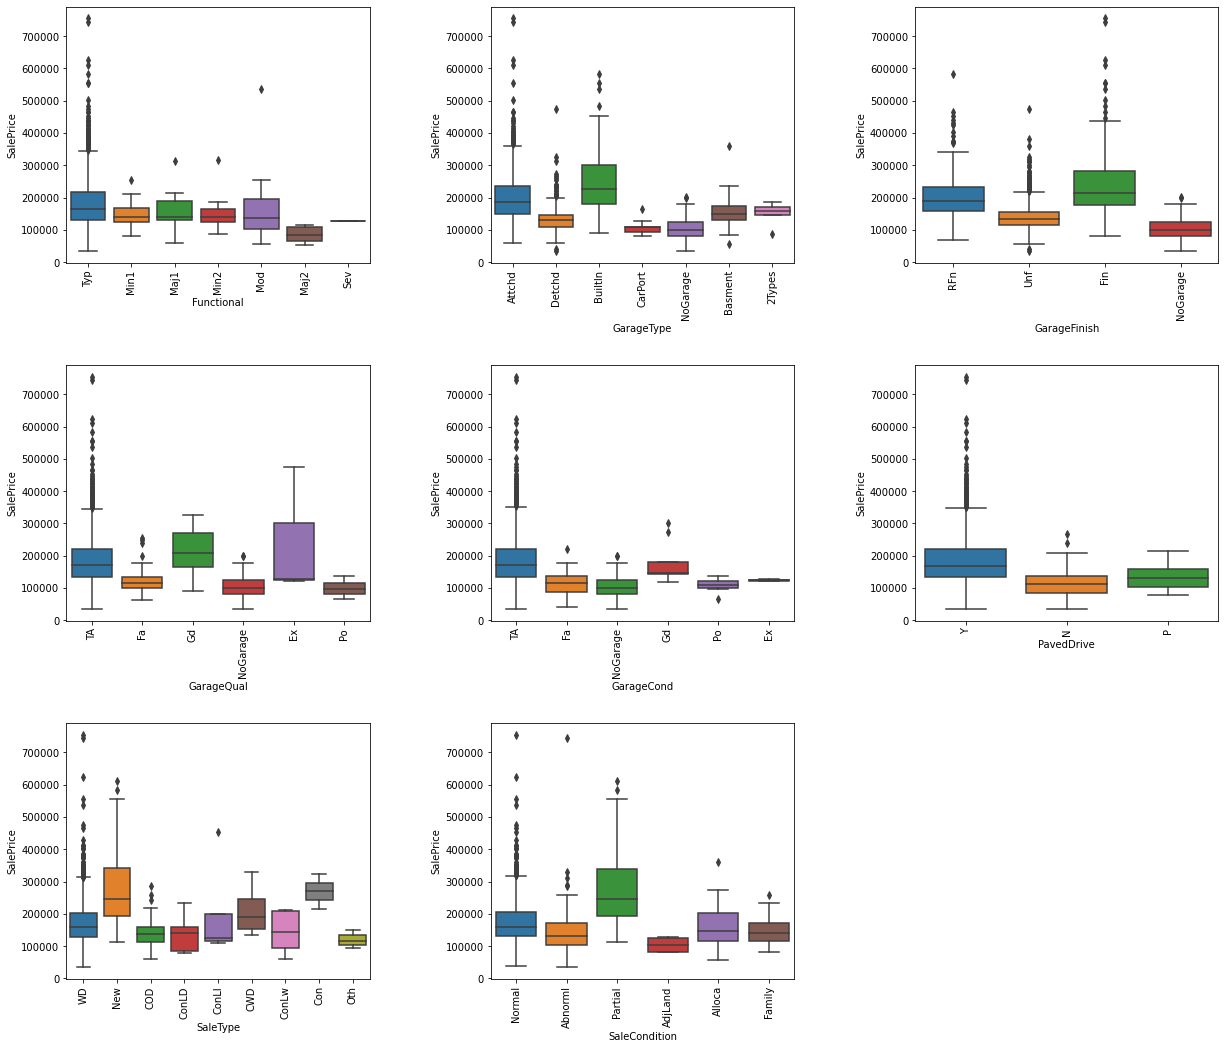

In [402]:
# 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',  'SaleCondition'
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'Functional',  data = sales_data, y = 'SalePrice')
plt.xticks(rotation=90)
plt.subplot(3,3,2)
sns.boxplot(x = 'GarageType', data = sales_data, y = 'SalePrice')
plt.xticks(rotation=90)
plt.subplot(3,3,3)
sns.boxplot(x = 'GarageFinish', data = sales_data, y = 'SalePrice')
plt.xticks(rotation=90)
plt.subplot(3,3,4)
sns.boxplot(x = 'GarageQual', data = sales_data, y = 'SalePrice')
plt.xticks(rotation=90)

plt.subplot(3,3,5)
sns.boxplot(x = 'GarageCond',  data = sales_data, y = 'SalePrice')
plt.xticks(rotation=90)

plt.subplot(3,3,6)
sns.boxplot(x = 'PavedDrive',  data = sales_data, y = 'SalePrice')
plt.xticks(rotation=90)

plt.subplot(3,3,7)
sns.boxplot(x = 'SaleType',  data = sales_data, y = 'SalePrice')
plt.xticks(rotation=90)

plt.subplot(3,3,8)
sns.boxplot(x = 'SaleCondition',  data = sales_data, y = 'SalePrice')
plt.xticks(rotation=90)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.4, hspace=0.4)
plt.show()

#### Deleting all below columns as they are highly skewed we observed using above charts.
- Street
- LandContour
- Utilities
- Condition1
- LandSlope
- Condition2
- RoofMatl
- BsmtCond
- BsmtFinType2
- Heating
- Electrical
- Functional
- GarageQual
- GarageCond
- PavedDrive
- SaleType
- CentralAir
- ExterCond

In [403]:
sales_data.drop(['Street','LandContour','Utilities','Condition1','LandSlope','Condition2','RoofMatl','BsmtCond','BsmtFinType2','Heating','Electrical','Functional','GarageQual','GarageCond','PavedDrive','SaleType','CentralAir','ExterCond'],axis=1,inplace=True)

In [404]:
sales_data.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,Good,Average,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,Normal,208500
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,Above Average,Very Good,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,Normal,181500
2,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,Good,Average,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,Normal,223500


In [405]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   BldgType       1460 non-null   object 
 8   HouseStyle     1460 non-null   object 
 9   OverallQual    1460 non-null   object 
 10  OverallCond    1460 non-null   object 
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  RoofStyle      1460 non-null   object 
 14  Exterior1st    1460 non-null   object 
 15  Exterior2nd    1460 non-null   object 
 16  MasVnrType     1460 non-null   object 
 17  MasVnrArea     1460 non-null   float64
 18  ExterQua

In [406]:
sales_data.corr()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.304522,0.116685,0.083348,0.178469,0.214367,0.042463,0.124098,0.363472,0.413773,0.072388,0.037469,0.368007,0.090343,-0.006979,0.180534,0.047222,0.236840,-0.004905,0.320518,0.233221,0.064370,0.269539,0.323511,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,0.304522,1.000000,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024812,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
YearBuilt,0.116685,0.014228,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.780555,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.083348,0.013788,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.618130,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.178469,0.103321,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.246178,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,0.214367,0.214103,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.150338,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,0.042463,0.111170,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.087126,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,0.124098,-0.002618,0.149040,0.181133,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.186098,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
TotalBsmtSF,0.363472,0.260833,0.391452,0.291066,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.311700,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.413773,0.299475,0.281986,0.240379,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.227127,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852


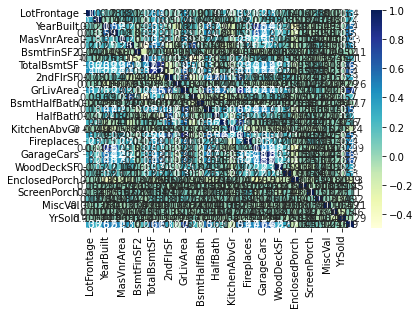

In [407]:
corr_data = sales_data.corr()
sns.heatmap(data=corr_data,annot=True,cmap="YlGnBu")
plt.show()

#### Observe correlation for top 10 predictors

In [408]:
corr_data = sales_data.corr()
cols = corr_data.nlargest(10, 'SalePrice')['SalePrice'].index # top 10 columns
corr_data[cols]

,SalePrice,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
LotFrontage,0.334771,0.368007,0.269539,0.323511,0.363472,0.413773,0.180534,0.320518,0.116685,0.083348
LotArea,0.263843,0.263116,0.154871,0.180403,0.260833,0.299475,0.126031,0.190015,0.014228,0.013788
YearBuilt,0.522897,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855
YearRemodAdd,0.507101,0.287389,0.420622,0.371600,0.291066,0.240379,0.439046,0.191740,0.592855,1.000000
MasVnrArea,0.472614,0.388052,0.361945,0.370884,0.360067,0.339850,0.272999,0.279568,0.311600,0.176529
BsmtFinSF1,0.386420,0.208171,0.224054,0.296970,0.522396,0.445863,0.058543,0.044316,0.249503,0.128451
BsmtFinSF2,-0.011378,-0.009640,-0.038264,-0.018227,0.104810,0.097117,-0.076444,-0.035227,-0.049107,-0.067759
BsmtUnfSF,0.214479,0.240257,0.214175,0.183303,0.415360,0.317987,0.288886,0.250647,0.149040,0.181133
TotalBsmtSF,0.613581,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066
1stFlrSF,0.605852,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379


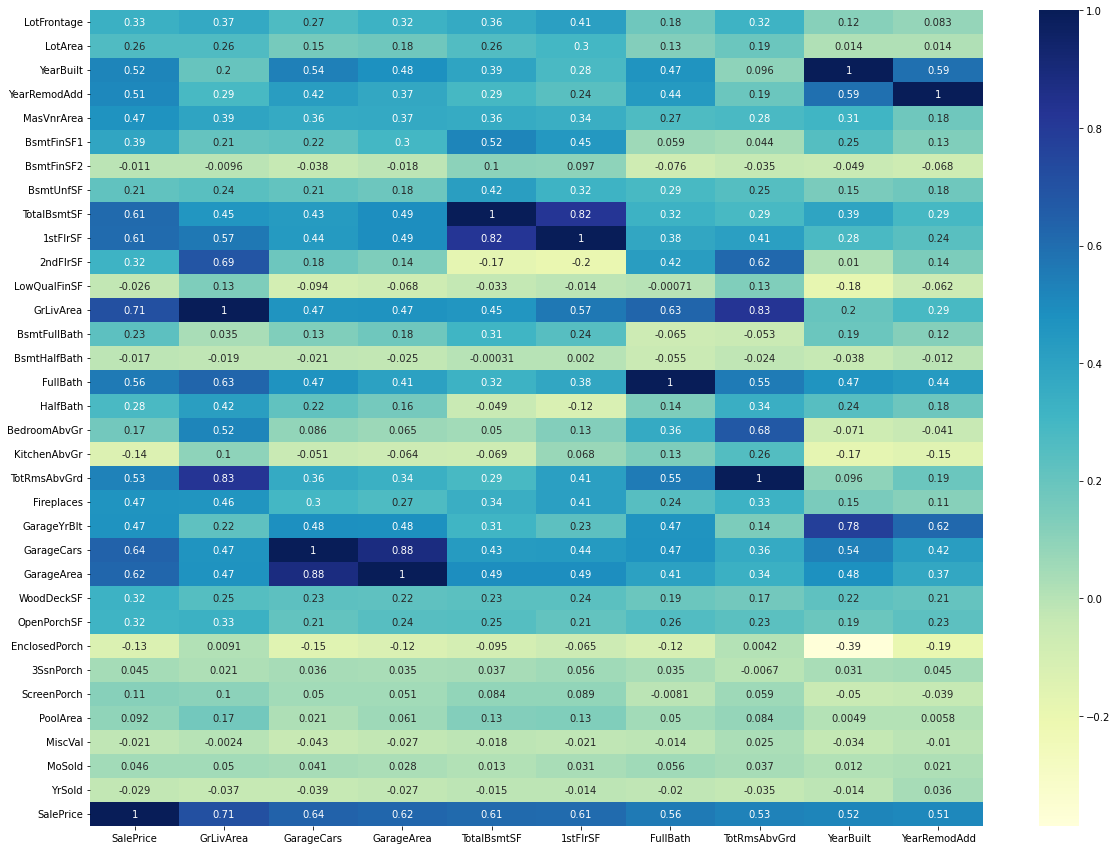

In [409]:
plt.figure(figsize=(20, 15))
sns.heatmap(data=corr_data[cols],annot=True,cmap="YlGnBu")
plt.show()

In [410]:
categorical_cols_DF = sales_data.select_dtypes(include=['object'])
categorical_cols_DF.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'SaleCondition'],
      dtype='object')

#### Dummy Encoding (categorical columns)

In [411]:
#create dummy variables/columns, delete first col.
dummyVarDF = pd.get_dummies(categorical_cols_DF , drop_first=True)
print(dummyVarDF.shape)

(1460, 157)


In [412]:
dummyVarDF.head(5)

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,...,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBasement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBasement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBasement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


#### Concat the dummy variables with the main dataset sales_data

In [413]:
# concat the dummy variables with the main dataset sales_data
sales_data_new = pd.concat([sales_data, dummyVarDF], axis=1)

In [414]:
sales_data_new.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,...,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBasement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBasement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBasement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,Good,Average,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,...,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,Above Average,Very Good,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,...,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,Good,Average,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,...,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
3,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,Good,Average,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,Very Good,Average,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


#### Dropping all main columns for which dummy variables are created

In [415]:
#dropping all main columns for which dummy variables are created
sales_data_new.drop(categorical_cols_DF.columns,axis=1,inplace=True)

In [416]:
sales_data_new.head(5)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,...,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBasement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBasement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBasement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


In [417]:
sales_data_new.shape

(1460, 191)

In [418]:
print(sales_data_new.columns)

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'GarageType_Detchd', 'GarageType_NoGarage', 'GarageFinish_NoGarage',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=191)


#### Reviewing all columns again and handling them (removing assuming they are not going to help in preduction)

In [419]:
sales_data_new[['YearRemodAdd','YearBuilt']].describe()

,YearRemodAdd,YearBuilt
count,1460.000000,1460.000000
mean,1984.865753,1971.267808
std,20.645407,30.202904
min,1950.000000,1872.000000
25%,1967.000000,1954.000000
50%,1994.000000,1973.000000
75%,2004.000000,2000.000000
max,2010.000000,2010.000000


In [420]:
sales_data_new['AgeOfProperty'] = 2010 - sales_data_new['YearBuilt']

In [421]:
sales_data_new.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True)

In [422]:
# reviewing all columns again and handling if any, before scaling
continuous_cols_new = sales_data_new.select_dtypes(include=['int64','float64'])
continuous_cols_new.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'AgeOfProperty'],
      dtype='object')

In [423]:
categorical_cols_new = sales_data_new.select_dtypes(include=['object'])
categorical_cols_new.columns

Index([], dtype='object')

In [424]:
sales_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 188 entries, LotFrontage to AgeOfProperty
dtypes: float64(2), int64(29), uint8(157)
memory usage: 577.6 KB


In [425]:
#N ow we can scale the numeric columns, but not the dummy variuables (true/false/uint)
continuous_cols_new = sales_data_new.select_dtypes(include=['int64','float64'])
continuous_cols_new.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'AgeOfProperty'],
      dtype='object')

### Before model building, we first need to perform the test-train split and scale the features, to ensure everything is on same scale for model

### Scaling

In [426]:
#Scaling to be done only for numeric columns (continuous_cols_new.columns)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [427]:
df_train, df_test = train_test_split(sales_data_new, train_size=0.8, random_state=100)
print(df_train.shape)
print(df_test.shape)

(1168, 188)
(292, 188)


In [428]:
continuous_cols_new.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'AgeOfProperty'],
      dtype='object')

In [429]:
df_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBasement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBasement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBasement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,AgeOfProperty
133,69.0,6853,136.0,1005,0,262,1267,1296,0,0,1296,1,0,2,0,2,1,6,0,2,471,192,25,0,0,0,0,0,6,220000,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,9
290,120.0,15611,0.0,0,0,1079,1079,1079,840,0,1919,0,0,2,1,3,1,8,1,2,685,0,51,0,0,0,0,0,7,233230,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,4
24,69.0,8246,0.0,188,668,204,1060,1060,0,0,1060,1,0,1,0,3,1,6,1,1,270,406,90,0,0,0,0,0,5,154000,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,42
1093,71.0,9230,166.0,661,0,203,864,1200,0,0,1200,1,0,1,1,1,1,6,0,2,884,0,64,0,0,0,0,0,10,146000,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,45
1288,40.0,5664,0.0,1158,0,343,1501,1659,0,0,1659,1,0,2,0,2,1,5,1,2,499,212,59,0,0,0,0,0,10,278000,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,10


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

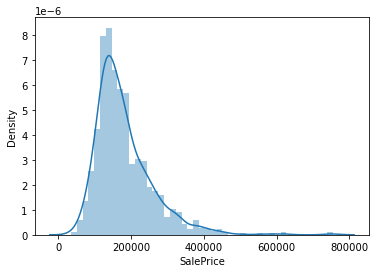

In [430]:
sns.distplot(df_train['SalePrice']) #  distribution for SalePrice

In [431]:
#Scaling
scaler = StandardScaler()
#df_train =scaler.fit_transform(df_train)
#df_test = scaler.transform(df_test) # <- note - no fit here

df_train[continuous_cols_new.columns] = scaler.fit_transform(df_train[continuous_cols_new.columns])
df_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBasement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBasement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBasement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,AgeOfProperty
133,-0.035224,-0.368268,0.177349,1.194627,-0.290350,-0.673762,0.453749,0.322470,-0.793198,-0.125448,-0.428561,1.078984,-0.24287,0.791918,-0.754301,-1.067877,-0.224935,-0.332538,-0.950249,0.301892,-0.015400,0.772142,-0.327420,-0.37712,-0.116888,-0.264644,-0.058235,-0.083201,-0.124423,0.497070,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.987083
290,2.314441,0.522089,-0.563579,-0.973738,-0.290350,1.158214,0.037033,-0.227488,1.131227,-0.125448,0.758017,-0.839209,-0.24287,0.791918,1.252587,0.163397,-0.224935,0.924433,0.615183,0.301892,0.983912,-0.751247,0.073786,-0.37712,-0.116888,-0.264644,-0.058235,-0.083201,0.240718,0.664074,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,-1.150607
24,-0.035224,-0.226653,-0.563579,-0.568113,3.708133,-0.803816,-0.005082,-0.275641,-0.793198,-0.125448,-0.878051,1.078984,-0.24287,-1.032461,-0.754301,0.163397,-0.224935,-0.332538,0.615183,-1.038829,-0.954007,2.470086,0.675596,-0.37712,-0.116888,-0.264644,-0.058235,-0.083201,-0.489563,-0.336055,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0.092178
1093,0.056919,-0.126617,0.340789,0.452421,-0.290350,-0.806059,-0.439531,0.079171,-0.793198,-0.125448,-0.611404,1.078984,-0.24287,-1.032461,1.252587,-2.299151,-0.224935,-0.332538,-0.950249,0.301892,1.913179,-0.751247,0.274389,-0.37712,-0.116888,-0.264644,-0.058235,-0.083201,1.336139,-0.437040,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0.190293
1288,-1.371308,-0.489144,-0.563579,1.524737,-0.290350,-0.492134,0.972428,1.242446,-0.793198,-0.125448,0.262816,1.078984,-0.24287,0.791918,-0.754301,-1.067877,-0.224935,-0.961023,0.615183,0.301892,0.115351,0.930828,0.197234,-0.37712,-0.116888,-0.264644,-0.058235,-0.083201,1.336139,1.229211,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.954378


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

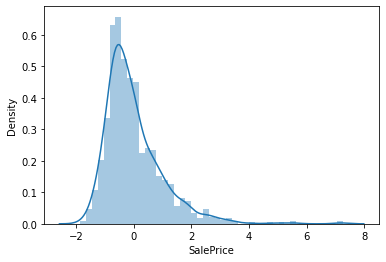

In [432]:
sns.distplot(df_train['SalePrice']) #  distribution for SalePrice

In [433]:
# <- note - no fit here for test data
df_test[continuous_cols_new.columns] = scaler.transform(df_test[continuous_cols_new.columns]) # <- note - no fit here
df_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBasement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBasement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBasement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,AgeOfProperty
1436,-0.449871,-0.149999,-0.563579,0.355330,-0.29035,-0.705154,-0.439531,-0.772377,-0.793198,-0.125448,-1.251356,-0.839209,-0.24287,-1.032461,-0.754301,0.163397,-0.224935,-0.961023,-0.950249,0.301892,0.250772,-0.751247,-0.713196,-0.37712,-0.116888,-0.264644,-0.058235,-0.083201,-0.489563,-0.758930,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,-0.005936
57,0.886213,0.118897,-0.563579,-0.973738,-0.29035,0.667146,-0.448398,-0.782514,1.177047,-0.125448,0.378998,-0.839209,-0.24287,0.791918,1.252587,0.163397,-0.224935,0.295948,-0.950249,0.301892,0.423550,-0.751247,0.366976,-0.37712,-0.116888,-0.264644,-0.058235,-0.083201,0.605858,0.200427,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,-1.085197
780,-0.311656,-0.264369,-0.356555,-0.973738,-0.29035,1.512501,0.387252,0.213492,-0.793198,-0.125448,-0.510459,-0.839209,-0.24287,0.791918,-0.754301,0.163397,-0.224935,-0.332538,0.615183,0.301892,-0.337609,0.994303,-0.389144,-0.37712,-0.116888,-0.264644,-0.058235,-0.083201,-0.124423,-0.058347,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.790853
382,0.425494,-0.125092,-0.563579,-0.973738,-0.29035,0.844289,-0.273288,-0.582299,1.172465,-0.125448,0.525654,-0.839209,-0.24287,0.791918,1.252587,0.163397,-0.224935,0.924433,-0.950249,0.301892,0.769106,0.391295,0.104648,-0.37712,-0.116888,-0.264644,-0.058235,-0.083201,-0.854704,0.415020,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,-1.150607
1170,0.287279,-0.060537,-0.563579,0.152517,-0.29035,0.025842,0.074715,-0.128647,-0.793198,-0.125448,-0.767583,1.078984,-0.24287,-1.032461,-0.754301,0.163397,-0.224935,-0.332538,0.615183,-1.038829,-0.543075,0.859420,-0.713196,-0.37712,-0.116888,-0.264644,17.790810,-0.083201,0.240718,-0.121462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.202165


### Preparation for the Model
 - creating X_train, X_test, y_train, y_test by splitting the data ( 80/20 ration)

In [434]:
#y_train - it should have only SalePrice
#x_train - all columns without SalePrice

y_train=df_train.pop('SalePrice')


In [435]:
y_train.head()

133     0.497070
290     0.664074
24     -0.336055
1093   -0.437040
1288    1.229211
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

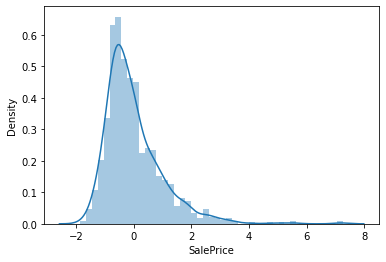

In [436]:
sns.distplot(y_train) #  distribution for SalePrice after scaling
# we can also use log data transformation for normal distribution

In [437]:
X_train=df_train
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBasement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBasement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBasement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,AgeOfProperty
133,-0.035224,-0.368268,0.177349,1.194627,-0.290350,-0.673762,0.453749,0.322470,-0.793198,-0.125448,-0.428561,1.078984,-0.24287,0.791918,-0.754301,-1.067877,-0.224935,-0.332538,-0.950249,0.301892,-0.015400,0.772142,-0.327420,-0.37712,-0.116888,-0.264644,-0.058235,-0.083201,-0.124423,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.987083
290,2.314441,0.522089,-0.563579,-0.973738,-0.290350,1.158214,0.037033,-0.227488,1.131227,-0.125448,0.758017,-0.839209,-0.24287,0.791918,1.252587,0.163397,-0.224935,0.924433,0.615183,0.301892,0.983912,-0.751247,0.073786,-0.37712,-0.116888,-0.264644,-0.058235,-0.083201,0.240718,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,-1.150607
24,-0.035224,-0.226653,-0.563579,-0.568113,3.708133,-0.803816,-0.005082,-0.275641,-0.793198,-0.125448,-0.878051,1.078984,-0.24287,-1.032461,-0.754301,0.163397,-0.224935,-0.332538,0.615183,-1.038829,-0.954007,2.470086,0.675596,-0.37712,-0.116888,-0.264644,-0.058235,-0.083201,-0.489563,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0.092178
1093,0.056919,-0.126617,0.340789,0.452421,-0.290350,-0.806059,-0.439531,0.079171,-0.793198,-0.125448,-0.611404,1.078984,-0.24287,-1.032461,1.252587,-2.299151,-0.224935,-0.332538,-0.950249,0.301892,1.913179,-0.751247,0.274389,-0.37712,-0.116888,-0.264644,-0.058235,-0.083201,1.336139,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0.190293
1288,-1.371308,-0.489144,-0.563579,1.524737,-0.290350,-0.492134,0.972428,1.242446,-0.793198,-0.125448,0.262816,1.078984,-0.24287,0.791918,-0.754301,-1.067877,-0.224935,-0.961023,0.615183,0.301892,0.115351,0.930828,0.197234,-0.37712,-0.116888,-0.264644,-0.058235,-0.083201,1.336139,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.954378


#### Above now we have X_train, y_train

In [438]:
#### Similarly get X_test and y_test

y_test=df_test.pop('SalePrice')

In [439]:
y_test.head()

1436   -0.758930
57      0.200427
780    -0.058347
382     0.415020
1170   -0.121462
Name: SalePrice, dtype: float64

In [440]:
X_test=df_test
X_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBasement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBasement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBasement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,AgeOfProperty
1436,-0.449871,-0.149999,-0.563579,0.355330,-0.29035,-0.705154,-0.439531,-0.772377,-0.793198,-0.125448,-1.251356,-0.839209,-0.24287,-1.032461,-0.754301,0.163397,-0.224935,-0.961023,-0.950249,0.301892,0.250772,-0.751247,-0.713196,-0.37712,-0.116888,-0.264644,-0.058235,-0.083201,-0.489563,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,-0.005936
57,0.886213,0.118897,-0.563579,-0.973738,-0.29035,0.667146,-0.448398,-0.782514,1.177047,-0.125448,0.378998,-0.839209,-0.24287,0.791918,1.252587,0.163397,-0.224935,0.295948,-0.950249,0.301892,0.423550,-0.751247,0.366976,-0.37712,-0.116888,-0.264644,-0.058235,-0.083201,0.605858,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,-1.085197
780,-0.311656,-0.264369,-0.356555,-0.973738,-0.29035,1.512501,0.387252,0.213492,-0.793198,-0.125448,-0.510459,-0.839209,-0.24287,0.791918,-0.754301,0.163397,-0.224935,-0.332538,0.615183,0.301892,-0.337609,0.994303,-0.389144,-0.37712,-0.116888,-0.264644,-0.058235,-0.083201,-0.124423,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.790853
382,0.425494,-0.125092,-0.563579,-0.973738,-0.29035,0.844289,-0.273288,-0.582299,1.172465,-0.125448,0.525654,-0.839209,-0.24287,0.791918,1.252587,0.163397,-0.224935,0.924433,-0.950249,0.301892,0.769106,0.391295,0.104648,-0.37712,-0.116888,-0.264644,-0.058235,-0.083201,-0.854704,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,-1.150607
1170,0.287279,-0.060537,-0.563579,0.152517,-0.29035,0.025842,0.074715,-0.128647,-0.793198,-0.125448,-0.767583,1.078984,-0.24287,-1.032461,-0.754301,0.163397,-0.224935,-0.332538,0.615183,-1.038829,-0.543075,0.859420,-0.713196,-0.37712,-0.116888,-0.264644,17.790810,-0.083201,0.240718,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.202165


#### Above now we have X_test, y_test

### We have y_train, X_train, y_test, X_test for Model building and Evaluation

### Model Building and Evaluation

In [441]:
# Importing the relevant libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

In [442]:
from sklearn.linear_model import Lasso,Ridge
lasso1 = Lasso()
lasso1.fit(X_train, y_train)

ridge1 = Ridge()
ridge1.fit(X_train, y_train)

Ridge()

In [443]:
def get_error_stats(y,y_pred,name="Test",DoPrint=True):
    MSE = mean_squared_error(y, y_pred)
    MAE = mean_absolute_error(y, y_pred)
    R2 = r2_score(y, y_pred)
    if DoPrint:
        print(F"MSE {name} {MSE}")
        print(F"MAE Score {name} {MAE}")
        print(F"R2 Score {name} {R2} \n")
    return MSE,MAE,R2

In [444]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

print("Number of non-zero Coefficients {}".format(np.sum(lasso1.coef_!=0)))
y_pred_train = lasso1.predict(X_train)
get_error_stats(y_train,y_pred_train)

y_pred_test = lasso1.predict(X_test)
get_error_stats(y_test,y_pred_test)

Number of non-zero Coefficients 0
MSE Test 1.0
MAE Score Test 0.7262283567354297
R2 Score Test 0.0 

MSE Test 1.0247871876307173
MAE Score Test 0.7157213993475747
R2 Score Test -0.00034758835279324884 



(1.0247871876307173, 0.7157213993475747, -0.00034758835279324884)

In [445]:
MSE_train=[]
MSE_test=[]
coefs = []
n_alphas = 500
alphas = np.logspace(-10, 5, n_alphas)
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    y_pred_train = ridge.predict(X_train)
    MSE_train.append(mean_squared_error(y_train,y_pred_train))

    y_pred_test = ridge.predict(X_test)
    MSE_test.append(mean_squared_error(y_test,y_pred_test))

<AxesSubplot:>

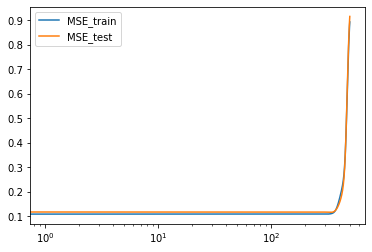

In [446]:
Results = pd.DataFrame({'MSE_train':MSE_train,"MSE_test":MSE_test})
Results.plot(legend=True,logx=True)

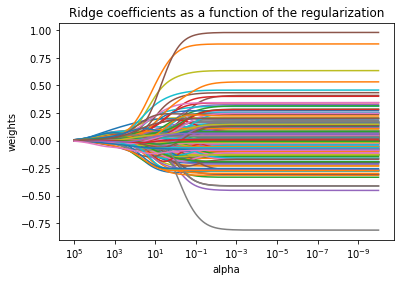

In [447]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [448]:
MSE_train=[]
MSE_test=[]
coefs = []
n_alphas = 500
alphas = np.logspace(-10, 5, n_alphas)
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    y_pred_train = lasso.predict(X_train)
    MSE_train.append(mean_squared_error(y_train,y_pred_train))

    y_pred_test = lasso.predict(X_test)
    MSE_test.append(mean_squared_error(y_test,y_pred_test))

<AxesSubplot:>

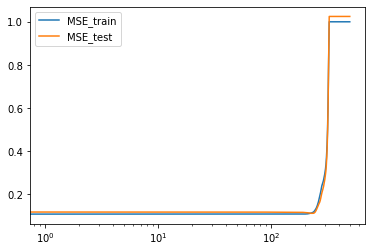

In [449]:
Results = pd.DataFrame({'MSE_train':MSE_train,"MSE_test":MSE_test})
Results.plot(legend=True,logx=True)

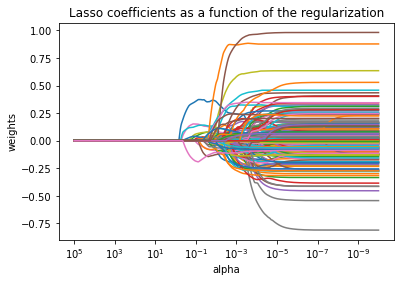

In [450]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

## Lasso

In [451]:
# list of alphas to tune
n_alphas
#from lecture params = {'alpha': np.logspace(-2, 0.001, 100)}
#params = {'alpha': np.logspace(-2, 0.0001, 50)}
#params = {'alpha': [0.00004,0.0001, 0.001, 0.01, 0.1, 10,100,1000]}
params = {'alpha': [0.00006,0.0006, 0.0008, 0.001, 0.002, 0.004, 0.006, 0.008 ]}

# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', # r2 also can be used
                        #scoring= 'r2', # r2 also can be used
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [6e-05, 0.0006, 0.0008, 0.001, 0.002, 0.004,
                                   0.006, 0.008]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [452]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.122870,0.057036,0.004189,0.002131,0.00006,{'alpha': 6e-05},-0.254268,-0.244247,-0.240793,-0.250914,-0.257195,-0.249484,0.006121,7,-0.202877,-0.205541,-0.175722,-0.200626,-0.205391,-0.198032,0.011300
1,0.121077,0.014530,0.006183,0.002476,0.0006,{'alpha': 0.0006},-0.236223,-0.231115,-0.230690,-0.227859,-0.238058,-0.232789,0.003770,4,-0.203082,-0.203318,-0.177589,-0.199592,-0.205240,-0.197764,0.010251
2,0.093948,0.020752,0.005585,0.002410,0.0008,{'alpha': 0.0008},-0.232374,-0.228659,-0.228710,-0.226293,-0.235683,-0.230344,0.003303,3,-0.203011,-0.202881,-0.178719,-0.199379,-0.204870,-0.197772,0.009690
3,0.072007,0.012041,0.004587,0.001850,0.001,{'alpha': 0.001},-0.230353,-0.227088,-0.226958,-0.225164,-0.233874,-0.228687,0.003087,2,-0.202951,-0.202323,-0.179386,-0.199302,-0.204602,-0.197713,0.009322
4,0.044281,0.007638,0.005387,0.002570,0.002,{'alpha': 0.002},-0.228526,-0.225672,-0.224919,-0.223887,-0.233619,-0.227324,0.003504,1,-0.205755,-0.203218,-0.184674,-0.200218,-0.206105,-0.199994,0.007946


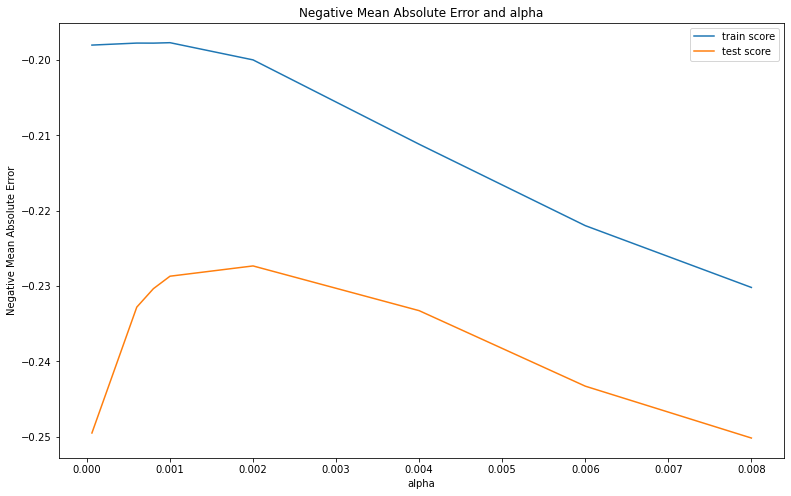

In [453]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(13, 8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [454]:
alpha = 0.002
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [455]:
lasso.coef_

array([-0.04137689,  0.04076153,  0.04654827,  0.        ,  0.00337902,
       -0.        ,  0.0568991 ,  0.        ,  0.0919862 , -0.02295327,
        0.24943079,  0.05651376,  0.01645926,  0.06070568,  0.02400087,
       -0.02468069, -0.06686123,  0.04178746,  0.0413376 ,  0.09667218,
       -0.00107178,  0.01177288, -0.00457678,  0.00947156,  0.02090138,
        0.01841485, -0.00793283, -0.        , -0.00226473, -0.        ,
        0.        ,  0.11140964, -0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.07453621,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.04124199,  0.        ,
        0.        , -0.06052284,  0.        , -0.09060438, -0.        ,
        0.07360473, -0.05362418, -0.        , -0.00349288, -0.        ,
        0.        ,  0.03126347,  0.        ,  0.00496359,  0.30792374,
       -0.19589316, -0.        , -0.00811515, -0.        , -0.01295597,
       -0.03961582,  0.        , -0.        ,  0.52325888,  0.34

In [456]:
lasso.score(X_train,y_train)

0.8764860942097517

In [457]:
lasso.score(X_test,y_test)

0.8875442708852868

In [458]:
# lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_test.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.152),
 ('LotFrontage', -0.23),
 ('LotArea', -0.221),
 ('MasVnrArea', -0.196),
 ('BsmtFinSF1', -0.19),
 ('BsmtFinSF2', -0.178),
 ('BsmtUnfSF', -0.138),
 ('TotalBsmtSF', -0.131),
 ('1stFlrSF', -0.129),
 ('2ndFlrSF', -0.114),
 ('LowQualFinSF', -0.112),
 ('GrLivArea', -0.108),
 ('BsmtFullBath', -0.101),
 ('BsmtHalfBath', -0.091),
 ('FullBath', -0.08),
 ('HalfBath', -0.077),
 ('BedroomAbvGr', -0.075),
 ('KitchenAbvGr', -0.071),
 ('TotRmsAbvGrd', -0.07),
 ('Fireplaces', -0.067),
 ('GarageCars', -0.065),
 ('GarageArea', -0.061),
 ('WoodDeckSF', -0.061),
 ('OpenPorchSF', -0.058),
 ('EnclosedPorch', -0.054),
 ('3SsnPorch', -0.046),
 ('ScreenPorch', -0.041),
 ('PoolArea', -0.04),
 ('MiscVal', -0.03),
 ('MoSold', -0.03),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.029),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.026),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.025),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', -0.023),
 ('MSSubClass_1-STORY W/FIN

#### From above, we can find that 93 fields are elminated when alpha is 0.002

In [459]:
y_pred = lasso.predict(X_test)
residual = y_test - y_pred

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

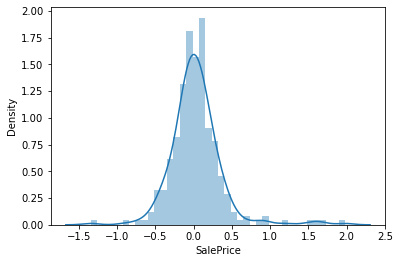

In [460]:
sns.distplot(residual)

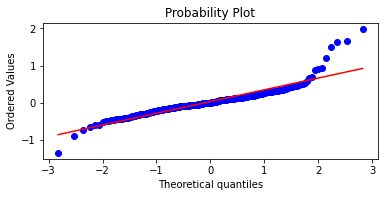

In [461]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

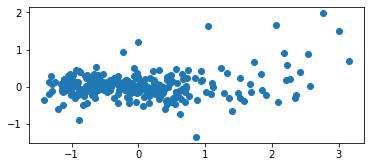

In [462]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)

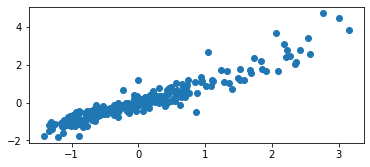

In [463]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, y_test)

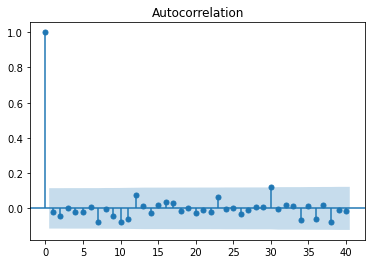

In [464]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()

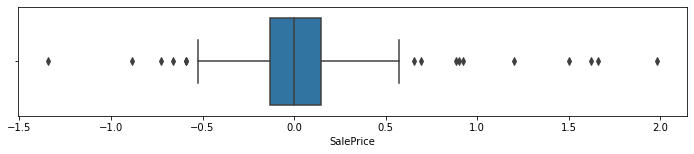

In [465]:
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=residual,whis=1.5)

#### Check when lamda/alpha is doubled what happends for Lasso.

In [466]:
alpha = 0.004
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.004)

In [467]:
lasso.score(X_train,y_train)

0.8612356852954818

In [468]:
lasso.score(X_test,y_test)

0.8733610670469663

In [469]:
# lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_test.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.077),
 ('LotFrontage', -0.174),
 ('LotArea', -0.147),
 ('MasVnrArea', -0.123),
 ('BsmtFinSF1', -0.115),
 ('BsmtFinSF2', -0.109),
 ('BsmtUnfSF', -0.1),
 ('TotalBsmtSF', -0.099),
 ('1stFlrSF', -0.095),
 ('2ndFlrSF', -0.09),
 ('LowQualFinSF', -0.081),
 ('GrLivArea', -0.077),
 ('BsmtFullBath', -0.065),
 ('BsmtHalfBath', -0.062),
 ('FullBath', -0.06),
 ('HalfBath', -0.04),
 ('BedroomAbvGr', -0.033),
 ('KitchenAbvGr', -0.032),
 ('TotRmsAbvGrd', -0.031),
 ('Fireplaces', -0.03),
 ('GarageCars', -0.029),
 ('GarageArea', -0.025),
 ('WoodDeckSF', -0.021),
 ('OpenPorchSF', -0.012),
 ('EnclosedPorch', -0.011),
 ('3SsnPorch', -0.007),
 ('ScreenPorch', -0.007),
 ('PoolArea', -0.006),
 ('MiscVal', -0.003),
 ('MoSold', 0.0),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.0),
 ('MSSubClass_1-STORY 1945 & OLDER', 0.0),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', 0.0),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', -0.0),
 ('MSSubClass_1-STORY W/FINISHED ATTIC 

#### From above we can find that 120 fields are eliminated when alpha is doubled to 0.004
#### note - 93 fields were elminated when alpha was 0.002

## Ridge

In [470]:
# list of alphas to tune
n_alphas
#from lecture params = {'alpha': np.logspace(-2, 0.001, 100)}

#params = {'alpha': [0.00004,0.0001, 0.001, 0.01, 0.1, 10,100,1000]}
params = {'alpha': [0.0001,0.001, 0.01, 0.1, 10,100]}
#params = {'alpha': [0.00006,0.0006, 0.0008, 0.001, 0.002, 0.004, 0.006, 0.008 ]}


# Applying Lasso
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', # r2 also can be used
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 10, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [471]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013369,0.001844,0.006377,0.002141,0.0001,{'alpha': 0.0001},-0.257484,-0.248979,-0.243766,-0.256134,-0.261203,-0.253513,0.006282,6,-0.203348,-0.206462,-0.175535,-0.201423,-0.205458,-0.198445,0.011586
1,0.011177,0.002474,0.004185,0.002021,0.001,{'alpha': 0.001},-0.257467,-0.248952,-0.243739,-0.256108,-0.261166,-0.253486,0.006281,5,-0.203343,-0.206456,-0.175539,-0.201415,-0.205456,-0.198442,0.011583
2,0.008378,0.002570,0.007380,0.001739,0.01,{'alpha': 0.01},-0.257299,-0.248683,-0.243506,-0.255844,-0.260807,-0.253228,0.006262,4,-0.203302,-0.206402,-0.175565,-0.201337,-0.205439,-0.198409,0.011556
3,0.012171,0.000960,0.004588,0.002406,0.1,{'alpha': 0.1},-0.255678,-0.246567,-0.242500,-0.253514,-0.257978,-0.251247,0.005805,3,-0.202993,-0.205987,-0.175603,-0.200815,-0.205390,-0.198158,0.011426
4,0.010971,0.003396,0.004786,0.002221,10,{'alpha': 10},-0.232031,-0.232489,-0.231739,-0.229005,-0.234876,-0.232028,0.001873,1,-0.203782,-0.203397,-0.182263,-0.200002,-0.206534,-0.199196,0.008717


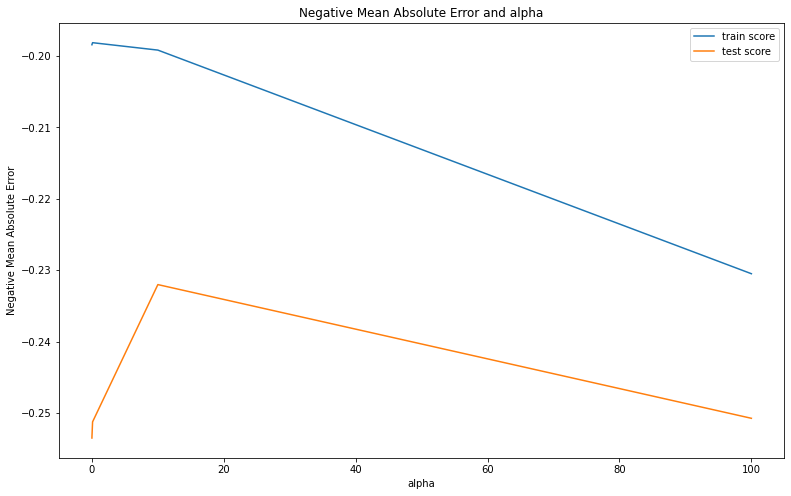

In [472]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(13, 8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [473]:
alpha = 10
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train) 

Ridge(alpha=10)

In [474]:
ridge.coef_

array([-0.04638273,  0.04408477,  0.05720638,  0.015289  ,  0.01183108,
        0.01542891,  0.03534   ,  0.04755165,  0.19155559, -0.01789191,
        0.19335019,  0.0513689 ,  0.01345028,  0.06790141,  0.02601878,
       -0.03962088, -0.06786173,  0.04842238,  0.04515994,  0.12356217,
       -0.01778913,  0.0154453 , -0.0061207 ,  0.01374162,  0.02071785,
        0.01748073, -0.00386531, -0.00078562, -0.0022304 ,  0.00061188,
       -0.0042813 ,  0.08721876, -0.09093105,  0.01738602, -0.00364697,
        0.00965961,  0.04717287, -0.03241219, -0.14724056,  0.01372175,
       -0.03148412,  0.02180876,  0.04659726,  0.13057523,  0.04954548,
        0.05081972, -0.02407304,  0.01426748, -0.15740402,  0.00687545,
        0.08616665, -0.13167467, -0.06643344, -0.01403102, -0.02067057,
        0.01296638,  0.02931791, -0.00660057, -0.02413508,  0.22323295,
       -0.25187906, -0.09067199, -0.09069978, -0.09175803, -0.13440788,
       -0.10437383,  0.02776222, -0.08459587,  0.40332202,  0.32

In [475]:
ridge.score(X_train,y_train)

0.8811503169382529

In [476]:
ridge.score(X_test,y_test)

0.8820537664727879

In [477]:
# Ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_test.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.361),
 ('LotFrontage', -0.252),
 ('LotArea', -0.24),
 ('MasVnrArea', -0.233),
 ('BsmtFinSF1', -0.226),
 ('BsmtFinSF2', -0.215),
 ('BsmtUnfSF', -0.204),
 ('TotalBsmtSF', -0.172),
 ('1stFlrSF', -0.172),
 ('2ndFlrSF', -0.157),
 ('LowQualFinSF', -0.154),
 ('GrLivArea', -0.147),
 ('BsmtFullBath', -0.144),
 ('BsmtHalfBath', -0.142),
 ('FullBath', -0.135),
 ('HalfBath', -0.134),
 ('BedroomAbvGr', -0.132),
 ('KitchenAbvGr', -0.126),
 ('TotRmsAbvGrd', -0.119),
 ('Fireplaces', -0.112),
 ('GarageCars', -0.106),
 ('GarageArea', -0.105),
 ('WoodDeckSF', -0.104),
 ('OpenPorchSF', -0.104),
 ('EnclosedPorch', -0.101),
 ('3SsnPorch', -0.096),
 ('ScreenPorch', -0.092),
 ('PoolArea', -0.091),
 ('MiscVal', -0.091),
 ('MoSold', -0.091),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.091),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.091),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.089),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', -0.085),
 ('MSSubClass_1-STORY

#### Check when lamda/alpha is doubled what happends for Ridge

In [478]:
alpha = 20 # <- doubled
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train) 

Ridge(alpha=20)

In [479]:
ridge.coef_

array([-4.16921500e-02,  4.10594972e-02,  6.91099604e-02,  2.29592553e-02,
        1.18991926e-02,  1.94621394e-02,  4.72321516e-02,  5.37332087e-02,
        1.79033074e-01, -2.01513702e-02,  1.87378422e-01,  5.00827099e-02,
        1.22618699e-02,  6.91107586e-02,  2.75566522e-02, -4.54739743e-02,
       -7.37138484e-02,  5.71155915e-02,  5.05201628e-02,  1.19924298e-01,
       -4.69082961e-03,  1.78881460e-02, -4.92811756e-03,  1.30169108e-02,
        1.99354265e-02,  1.74207603e-02, -5.99351521e-03, -1.61197962e-03,
       -7.26284194e-04, -7.48559432e-03, -4.99419140e-03,  9.22535114e-02,
       -6.91898488e-02,  1.54358934e-02, -5.70232533e-03,  6.16896502e-03,
        4.79023846e-02, -2.68819348e-02, -1.23703240e-01,  1.06640669e-02,
       -1.80629160e-02,  1.23361177e-02,  2.55409773e-02,  9.65445006e-02,
        2.78973197e-02,  4.31495439e-02, -4.61485137e-02,  1.07025406e-02,
       -1.18327124e-01,  1.40999361e-04,  8.15722237e-02, -9.58596783e-02,
       -3.36903818e-02, -

In [480]:
ridge.score(X_train,y_train)

0.8727687940541118

In [481]:
ridge.score(X_test,y_test)

0.8768225519267321

In [482]:
# Ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_test.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.37),
 ('LotFrontage', -0.22),
 ('LotArea', -0.209),
 ('MasVnrArea', -0.208),
 ('BsmtFinSF1', -0.193),
 ('BsmtFinSF2', -0.165),
 ('BsmtUnfSF', -0.15),
 ('TotalBsmtSF', -0.148),
 ('1stFlrSF', -0.133),
 ('2ndFlrSF', -0.124),
 ('LowQualFinSF', -0.123),
 ('GrLivArea', -0.121),
 ('BsmtFullBath', -0.118),
 ('BsmtHalfBath', -0.118),
 ('FullBath', -0.107),
 ('HalfBath', -0.106),
 ('BedroomAbvGr', -0.104),
 ('KitchenAbvGr', -0.101),
 ('TotRmsAbvGrd', -0.096),
 ('Fireplaces', -0.094),
 ('GarageCars', -0.092),
 ('GarageArea', -0.09),
 ('WoodDeckSF', -0.088),
 ('OpenPorchSF', -0.087),
 ('EnclosedPorch', -0.087),
 ('3SsnPorch', -0.084),
 ('ScreenPorch', -0.074),
 ('PoolArea', -0.07),
 ('MiscVal', -0.07),
 ('MoSold', -0.069),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.069),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.068),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.068),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', -0.065),
 ('MSSubClass_1-STORY W/FI

#### Coefficient of top 10 important variables after alpha is doubled for Ridge

- AgeOfProperty 0.399
- constant 0.37
- SaleCondition_Partial0.311
- SaleCondition_Normal 0.278
- SaleCondition_Family 0.235
- SaleCondition_Alloca 0.207
- SaleCondition_AdjLand 0.187
- GarageFinish_Unf 0.186
- GarageFinish_RFn 0.185
- GarageFinish_NoGarage 0.179
- GarageType_NoGarage 0.151


<H2> MAE </H2>
<p> Mean absolute error (or mean absolute deviation) is another metric which finds the average absolute distance between the predicted and target values. MAE is define as below: </p>

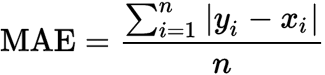

<p> MAE is known to be more robust to the outliers than MSE. The main reason being that in MSE by squaring the errors, the outliers (which usually have higher errors than other samples) get more attention and dominance in the final error and impacting the model parameters. </p>



<H2> MSE</H2>
<p>“Mean squared error” is perhaps the most popular metric used for regression problems. It essentially finds the average squared error between the predicted and actual values.
Let’s assume we have a regression model which predicts the price of houses in Seattle area (show them with ŷᵢ), and let’s say for each house we also have the actual price the house was sold for (denoted with yᵢ). Then the MSE can be calculated as:</p>

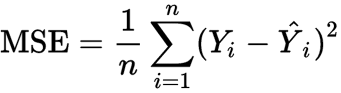

<p> Sometimes people use RMSE to have a metric with scale as the target values, which is essentially the square root of MSE.
Looking at house pricing prediction, RMSE essentially shows what is the average deviation in your model predicted house prices from the target values (the prices the houses are sold for).</p>

In [483]:
MSE_train_Ridge=[]
MSE_test_Ridge=[]
MSE_train_Lasso=[]
MSE_test_Lasso=[]

n_alphas = 200
alphas = np.logspace(-1, 2, n_alphas)
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    
    y_pred_train = ridge.predict(X_train)
    MSE_train_Ridge.append(r2_score(y_train,y_pred_train))
    y_pred_test = ridge.predict(X_test)
    MSE_test_Ridge.append(r2_score(y_test,y_pred_test))

<AxesSubplot:>

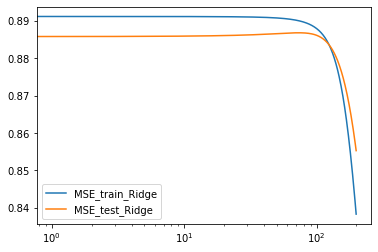

In [484]:
Results = pd.DataFrame({'MSE_train_Ridge':MSE_train_Ridge,"MSE_test_Ridge":MSE_test_Ridge})
Results.plot(legend=True,logx=True)

In [485]:
n_alphas = 100
alphas = np.logspace(-1, 2, n_alphas)
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    y_pred_train = lasso.predict(X_train)
    MSE_train_Lasso.append(mean_squared_error(y_train,y_pred_train))

    y_pred_test = lasso.predict(X_test)
    MSE_test_Lasso.append(mean_squared_error(y_test,y_pred_test))

<AxesSubplot:>

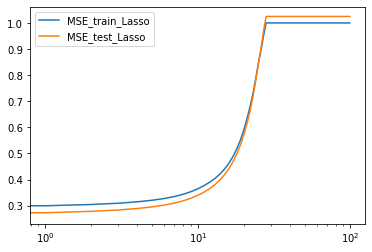

In [486]:
Results = pd.DataFrame({'MSE_train_Lasso':MSE_train_Lasso,"MSE_test_Lasso":MSE_test_Lasso})
Results.plot(legend=True,logx=True)


## Conclusion :

   **Score for both Ridge and Lasso regression.**
   - Ridge : Train :88.11    Test :88.20
   - Lasso : Train :87.64    Test :88.75


   **Optimal value of lamda for both Ridge and Lasso regression.**
   - Optimal Value of lamda for ridge : 10
   - Optimal Value of lamda for Lasso : 0.002


### Top 5 most important varables in Ridge are:


    - AgeOfProperty	0.512
    - SaleCondition_Partial	0.403
    - SaleCondition_Normal	0.362
    - SaleCondition_Family	0.326
    - SaleCondition_Alloca	0.229
  
      Next top 5 most important variables in Ridge are
      - SaleCondition_AdjLand	0.225
      - GarageFinish_Unf	0.223
      - GarageFinish_RFn	0.218
      - GarageFinish_NoGarage	0.193
      - GarageType_NoGarage	0.192


### Top 5 most important variables in Lasso are:

    - AgeOfProperty	0.872
    - SaleCondition_Partial	0.792
    - SaleCondition_Normal	0.523
    - SaleCondition_Family	0.341
    - SaleCondition_Alloca	0.329

      Next top 5 most important variables in Lasso regression are
      - SaleCondition_AdjLand	0.308
      - GarageFinish_Unf	0.249
      - GarageFinish_RFn	0.242
      - GarageFinish_NoGarage	0.204
      - GarageType_NoGarage	0.172


**Note - most of the fields (93) have zero coefficient, So we can see feature elimination and selection here.**


